# Preamble

In [2]:
# preamble
base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_codes'


import numpy as np
import torch
import matplotlib.pyplot as plt
import random

from google.colab import drive

import shutil
import pickle
import os

import time

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


!pip install import-ipynb
import import_ipynb


from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)



if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')



shutil.copy ( base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight

if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')



shutil.copy ( base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/'  )    

import my_signal_processing


base_directory_data_str =  base_directory_str + '/data/figureS1_data/'
base_directory_figure_str =  base_directory_str + '/figures/figureS1/'

if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")


print(device)
plt.rcParams["mathtext.default"]= 'regular'

plt_fontsize_label_ = 30
plt_fontsize_legend_ = 27

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

                

Mounted at /content/gdrive
cpu


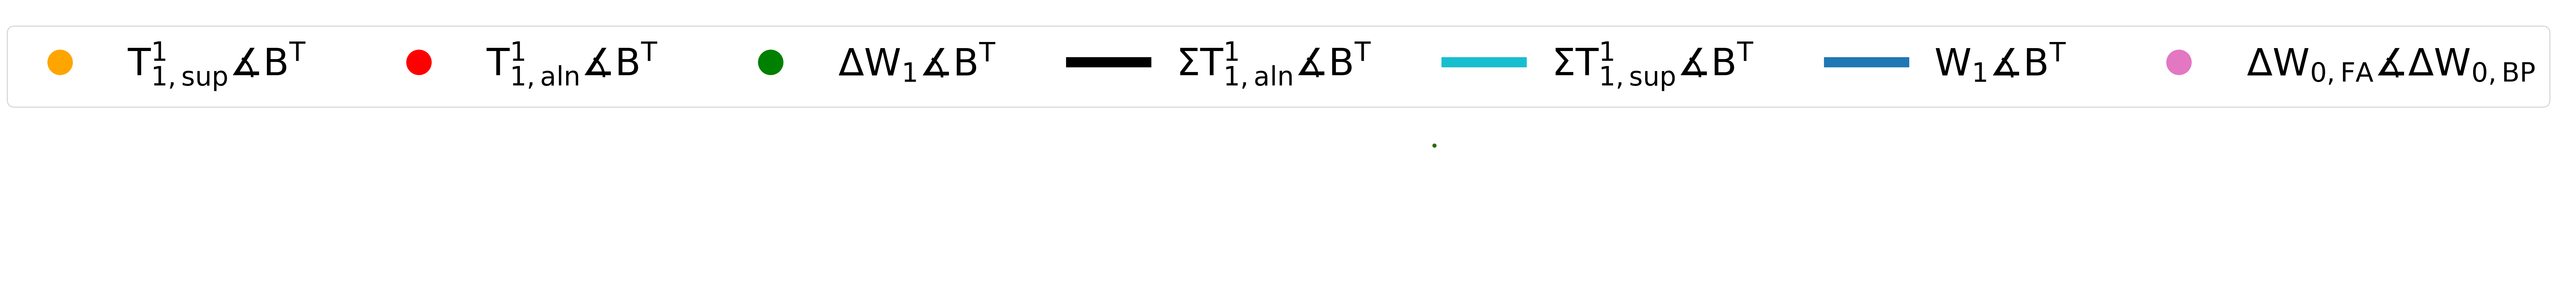

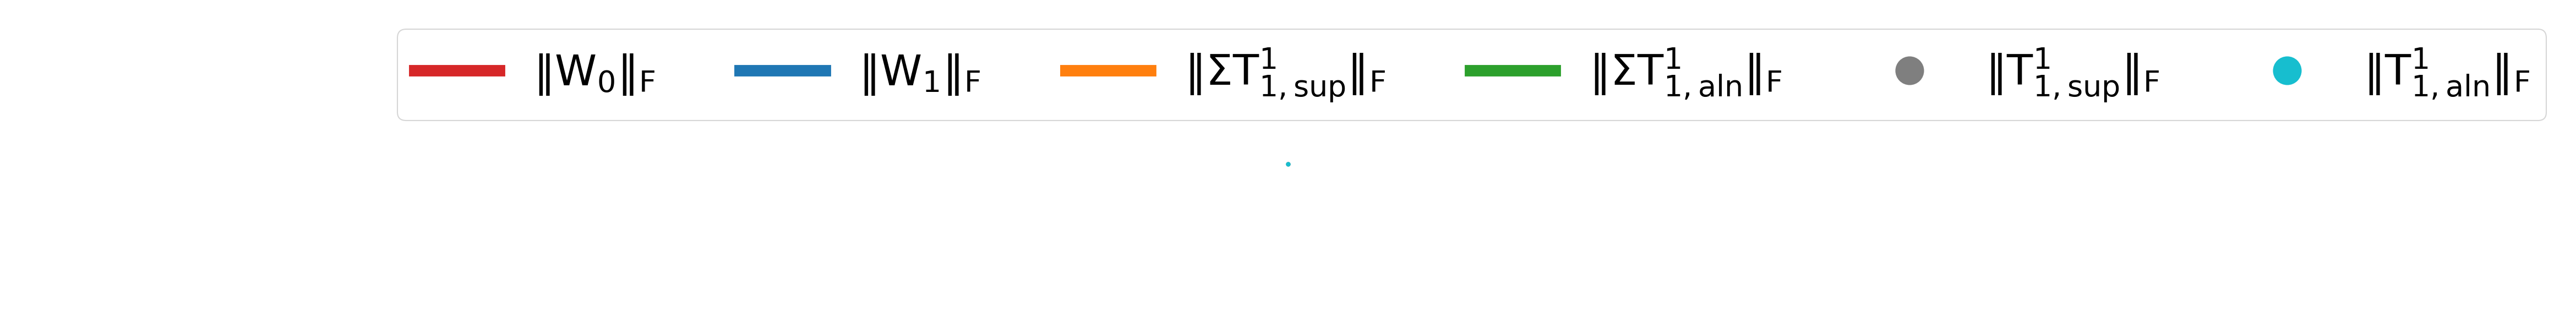

In [3]:

embed_legend = False



plt.figure(num = None, figsize=(40,5) , dpi=300, facecolor='w', edgecolor='k')


plt.plot( [0]   , '.' , label =  r"$T^1_{1,sup} \measuredangle B^T $" , alpha = 0.8 , color='orange' , markersize = 6 ) 
plt.plot( [0]   , '.' , label = r"$T^1_{1,aln} \measuredangle B^T $" , alpha = 0.8 , color='r' , markersize = 6 ) 
plt.plot( [0]    , '.' , label =  r"$\Delta W_1 \measuredangle B^T $" , alpha = 0.8 , color='g' , markersize = 6 ) 




plt.plot( [0]    , '-' , label =  r"$\Sigma T^1_{1,aln} \measuredangle B^T  $" , alpha = 1  , linewidth = 2 , color= 'k' ) 
plt.plot( [0]    , '-' , label =  r"$\Sigma T^1_{1,sup} \measuredangle B^T $" , alpha = 1  , linewidth = 2 , color= my_cycle[5]  ) 
plt.plot( [0]   , '-' , label = r"$W_1 \measuredangle B^T $" , linewidth = 3 , color = my_cycle[0] ) 
plt.plot( [0]  , '.' , label =  r"$\Delta W_{0,FA} \measuredangle \Delta W_{0,BP} $" 
         , alpha = 1 , color=my_cycle[-2] , markersize = 6 ,zorder=1 ) 




leg =  plt.legend(  fontsize = plt_fontsize_legend_ +10  , markerscale=8 ,ncol=7 )

for line in leg.get_lines():
    line.set_linewidth(10)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.axis('off')


def export_legend(legend, filename  , expand=[-40,-40,40,40]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)


export_legend(leg  , filename = base_directory_figure_str + "/legend_angle.jpg"  )



plt.show()





plt.figure(num = None, figsize=(40,5) , dpi=150, facecolor='w', edgecolor='k')




plt.plot( [0]   , '-' , label = r"$\Vert W_0 \Vert_{F}$" , linewidth = 2 , color= my_cycle[3] ) 

plt.plot( [0]  , '-' , label = r"$\Vert W_1 \Vert_{F}$"  , linewidth = 5  , color= my_cycle[0] ) 


plt.plot( [0]   , '-' , label = r"$\Vert \Sigma  T^1_{1,sup} \Vert_{F}$"  , linewidth = 5  , color= my_cycle[1]  ) 
plt.plot( [0]   , '-' , label = r"$\Vert \Sigma  T^1_{1,aln} \Vert_{F}$", linewidth = 3  , color= my_cycle[2] ) 






plt.plot( [0]   , '.' , label = r"$\Vert T^1_{1,sup} \Vert_{F}$"  , linewidth = 5 , color= my_cycle[4] ) 
plt.plot( [0]   , '.' , label = r"$\Vert T^1_{1,aln} \Vert_{F}$", linewidth = 3  , color= my_cycle[5]) 


plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$Norm$", fontsize= plt_fontsize_label_)

leg =  plt.legend(  fontsize = plt_fontsize_legend_ +10 , markerscale=8 ,ncol=7 )

for line in leg.get_lines():
    line.set_linewidth(10)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


plt.axis('off')
    
export_legend(leg  , filename=base_directory_figure_str + "/legend_norm.jpg"  )

plt.show()






#  # 2 iter. reinit. E 

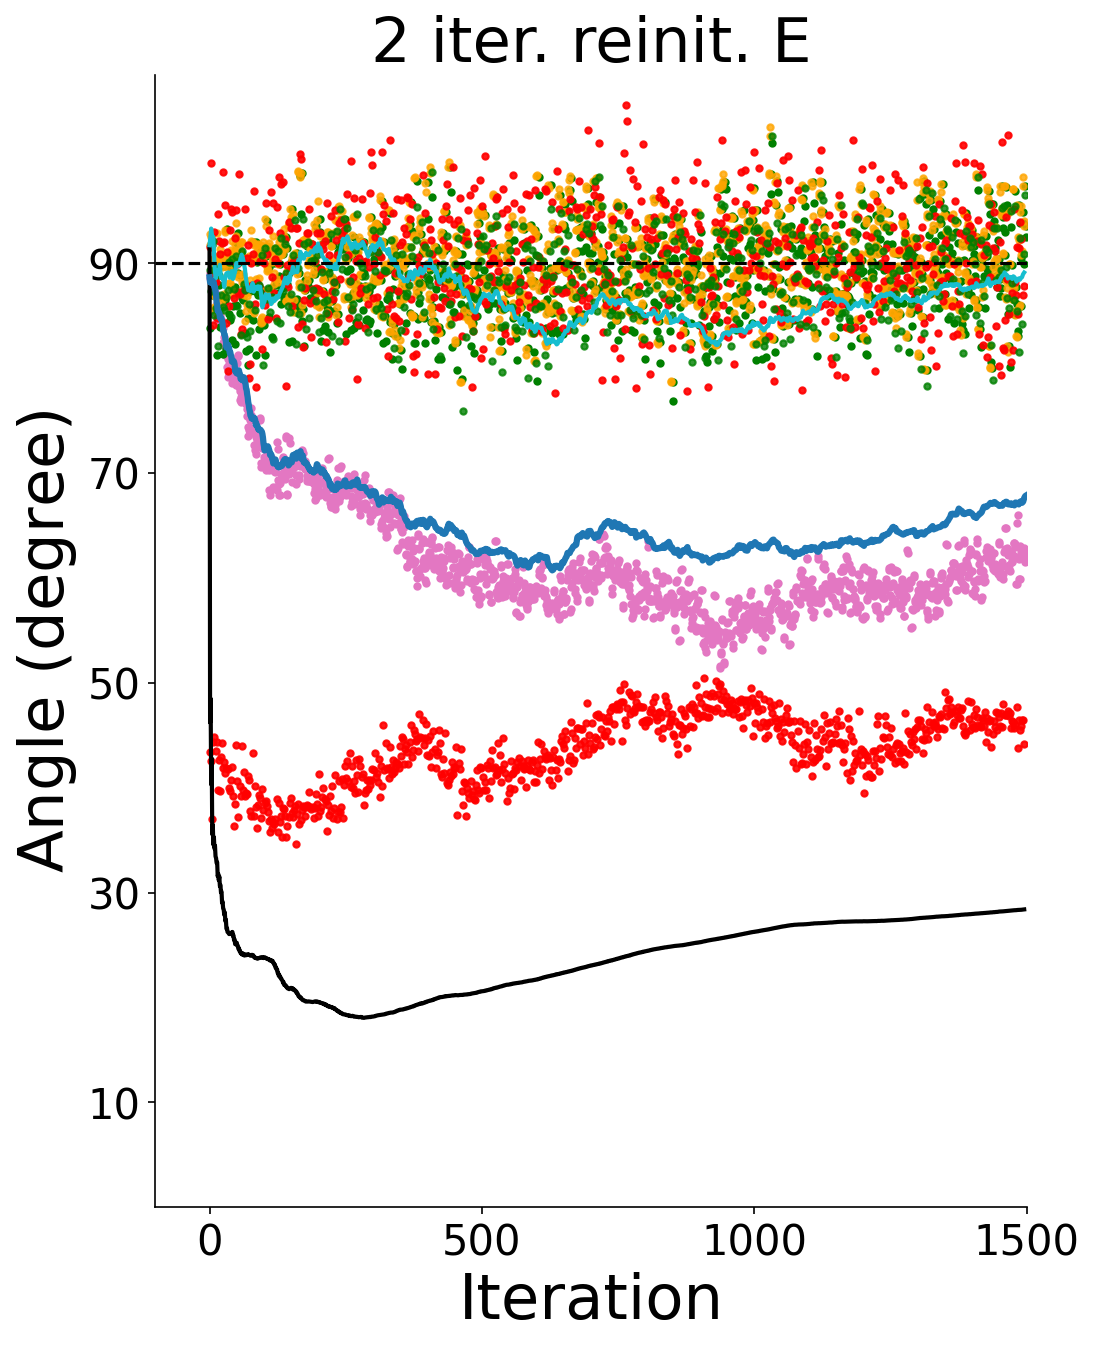

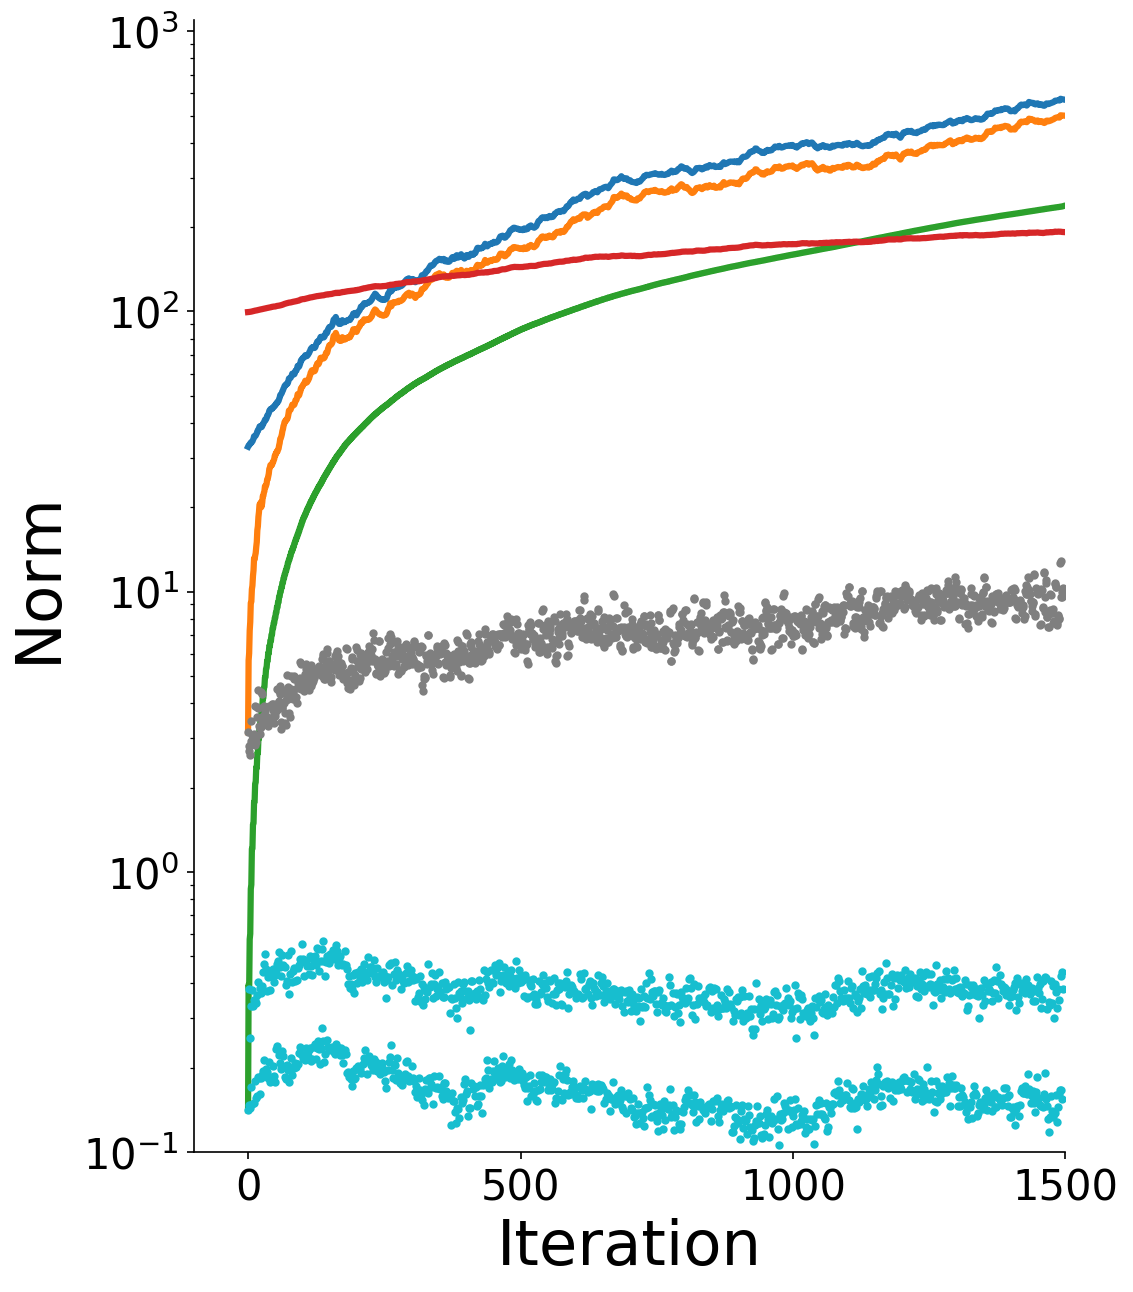

In [4]:



N_epoch = 1500
figsize__ = (7.5,10)

N_input = 100
N_hidden = 100
N_output = 10
N_batch = 100

lr = .002

W0 = (torch.randn([N_input , N_hidden])) 
W1 = (torch.randn([N_hidden , N_output]))  
B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 

angle_W1_B_list = []
angle_dW1_B_list = []

angle_W0_dw0_list = []
angle_W1_dw1_list = []

error_mean_list = []

error_mean_tensor = torch.zeros([N_output , N_epoch ])

loss_list = []

angle_dW0_bp_dW0_fa_list = []

angle_W0_W0_inf_list =[]
angle_W1_W1_inf_list =[]

alignment_term_SUM_angle_B_list  = []
supalignment_term_SUM_angle_B_list  = []


angle_dW1_W1_list = []

def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1



temp_list = []

norm_dw0_list = []
angle_W0_change_list = []
angle_E_change_list = []


E = torch.randn( [N_batch , N_output] )

E_list = []
delta0_list = []
delta1_list = []
W0_list = []
W1_list = []
L1_list = []
L2_list = []
Z1_list = []
Z2_list = []

norm_supalignment_term = []
norm_alignment_term = []

norm_W0 = []
norm_W1 = []




norm_SUM_supalignment_term = []
norm_SUM_alignment_term = []


dw1_dw1_angle_list = []

alignment_term_angle_B_list = []
sup_alignment_term_angle_B_list = []


alignment_term_sum = None
sup_alignment_term_sum = None

alignment_term_plus_supalignment_term_angle = []
for i in range(N_epoch):
  
  if i % 2 == 0:
    E = torch.randn( [N_batch , N_output] )


  Z1 = torch.matmul(   X  ,  W0  )
  L1 = activation1( Z1 )
  Z2 = torch.matmul(   L1  ,  W1  )
  L2 = activation1(  Z2   )



  delta1 = torch.mul( E , derivative_activation1( Z2 )  ) 
  dw1 = lr* torch.matmul (  L1.t()  ,  delta1  )



  delta0 = torch.matmul (  delta1  ,  B  )
  delta0 = torch.mul (  delta0  ,  derivative_activation1(Z1)   )


  dw0 = lr* torch.matmul (     X.t()   ,    delta0  )

  
  W0 = W0 + dw0
  W1 = W1 + dw1


  delta0_bp = torch.matmul (  delta1  ,  W1.t()  )
  delta0_bp = torch.mul (  delta0_bp  ,  derivative_activation1(Z1)   )


  dw0_bp = lr* torch.matmul (     X.t()   ,    delta0_bp  )

  angle_dW0_bp_dW0_fa_list.append( my_weight.angle(dw0_bp ,dw0 )  )



  angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )
  angle_dW1_B_list.append(   my_weight.angle(  dw1  ,  B.t()   )   )
  angle_dW1_W1_list.append(   my_weight.angle(  dw1  ,  W1   )   ) 



  E_list .append(E)
  delta0_list .append( delta0 )
  delta1_list .append( delta1 )

  L1_list .append( L1 )
  L2_list .append( L2 )
  Z1_list .append( Z1 )
  Z2_list .append( Z2 )


  if i > 3 :

    W0_k   = W0
    W0_k_1 = W0_list[-1]
    W0_k_2 = W0_list[-2]

    W1_k   = W1
    W1_k_1 = W1_list[-1]
    W1_k_2 = W1_list[-2]

    delta0_k_1 = delta0_list[-1]
    delta0_k_2 = delta0_list[-2]

    delta1_k_1 = delta1_list[-1]
    delta1_k_2 = delta1_list[-2]

    W0_k = W0_k_1.t()  +  lr * torch.matmul(  delta0_k_1.t()   ,   X   )


    temp1q = torch.matmul(  W0_k_1.t()  , X.t() )
    temp1q = activation1( temp1q )
    temp1q = lr*torch.matmul(   temp1q  ,  delta1_k_1  )



    dw1_dw1_angle_list.append(  (  W0_k.t() -  W0 ).sum()   )



    temp1 = torch.matmul (  W0_list[-2].t()  ,  X.t() )
    temp1 =  derivative_activation1( temp1 )  

    temp2 = torch.matmul( delta1_list[-2]  , B )
    temp3 =  derivative_activation1( Z1_list[-2] )  
    temp2 = torch.mul(temp2 , temp3)
    temp4 = torch.matmul (    torch.matmul (  temp2 .t() , X   )  , X.t()  )
    temp4 = torch.mul( temp1  , temp4   )
    temp4 = lr*lr*torch.matmul (  temp4  ,  delta1_list[-1]  )
    alignment_term = temp4


    temp11 = torch.matmul ( W0_list[-2].t() , X.t() )
    temp11 = activation1 ( temp11  )
    temp11 = lr*torch.matmul (  temp11  ,  delta1_list[-1]  )
    sup_alignment_term = temp11

    if alignment_term_sum == None : alignment_term_sum = alignment_term 
    else:
      alignment_term_sum = alignment_term_sum + alignment_term 

    if sup_alignment_term_sum == None : sup_alignment_term_sum = sup_alignment_term 
    else:
      sup_alignment_term_sum = sup_alignment_term_sum + sup_alignment_term





    alignment_term_angle_B_list.append(   my_weight.angle( alignment_term  ,  B.t() )   )
    sup_alignment_term_angle_B_list.append(   my_weight.angle( sup_alignment_term  ,  B.t() )  )

    

    alignment_term_SUM_angle_B_list.append(   my_weight.angle( alignment_term_sum ,  B.t() )     )
    supalignment_term_SUM_angle_B_list.append(   my_weight.angle( sup_alignment_term_sum ,  B.t() )     )




    norm_W0 .append(  W0.norm() )
    norm_W1  .append(  W1.norm() )

    norm_SUM_supalignment_term .append(  sup_alignment_term_sum.norm() )
    norm_SUM_alignment_term .append(  alignment_term_sum.norm() )


    norm_supalignment_term .append(  sup_alignment_term.norm() )
    norm_alignment_term .append(  alignment_term.norm() )



    temp_list.append(  my_weight.angle ( alignment_term + sup_alignment_term , dw1 )  )

  

  alignment_term_plus_supalignment_term_angle.append(   my_weight.angle( dw1 ,  B.t() )     )

  W0_list.append( W0 )
  W1_list.append( W1 )





angle_W1_B_fixed_E = angle_W1_B_list  






plt.figure(num = None, figsize=figsize__, dpi=150, facecolor='w', edgecolor='k')

list_index1 = list ( range(0,len(alignment_term_plus_supalignment_term_angle) , 3) )
list_index2 = []

for i in range( len (alignment_term_plus_supalignment_term_angle) ):
  if not i in list_index1:
    list_index2.append(i)


plt.plot( angle_dW0_bp_dW0_fa_list  , '.' , label =  r"$\Delta W_{0,FA} \measuredangle \Delta W_{0,BP} $" 
         , alpha = 1 , color=my_cycle[-2] , markersize = 6 ,zorder=1 ) 


plt.plot( list_index2 , [alignment_term_plus_supalignment_term_angle[i] for i in list_index2]  , '.' , label =  r"$\Delta W_1 \measuredangle B^T $" , alpha = 1 , color='g' , markersize = 6 ,zorder=1 ) 


plt.plot( sup_alignment_term_angle_B_list   , '.' , label =  r"$T_{subalign} \measuredangle B^T $" , alpha = 0.8 , color='orange' , markersize = 6 ,zorder=1) 
plt.plot( alignment_term_angle_B_list  , '.' , label = r"$T_{align} \measuredangle B^T $" , alpha = 0.9 , color='r' , markersize = 6 ,zorder = 1 ) 


plt.plot( list_index1 , [alignment_term_plus_supalignment_term_angle[i] for i in list_index1]  , '.' , label =  r"$\Delta W_1 \measuredangle B^T $" , alpha = 0.8 , color='g' , markersize = 6 ,zorder=1 ) 



plt.plot( alignment_term_SUM_angle_B_list   , '-' , label =  r"$\sum T_{align} \measuredangle B^T  $" , alpha = 1  , linewidth = 2 , color= 'k' ) 
plt.plot( supalignment_term_SUM_angle_B_list   , '-' , label =  r"$\sum T_{subalign} \measuredangle B^T $" , alpha = 1  , linewidth = 2 , color= my_cycle[5]  ) 
plt.plot( angle_W1_B_fixed_E  , '-' , label = r"$W_1 \measuredangle B^T $" , linewidth = 3 , color = my_cycle[0] ) 


plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$Angle\ (degree)$", fontsize= plt_fontsize_label_)

plt.hlines( y=90 , xmin=-100 , xmax=N_epoch  , linestyle = '--' , zorder = 100)



plt.title('2 iter. reinit. E' , fontsize= plt_fontsize_label_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(0,108)
plt.xlim(-100 ,N_epoch)
plt.yticks([10,30 ,50 ,70 ,90])
plt.savefig(base_directory_figure_str + '/2 iter. reinit. E  _angle.jpg' , dpi=300 , bbox_inches='tight'  ) 

plt.show()






plt.figure(num = None, figsize=figsize__, dpi=150, facecolor='w', edgecolor='k')




plt.plot( norm_W1  , '-' , label = r"$\Vert W_1 \Vert_{_2}$"  , linewidth = 3 , color= my_cycle[0] ) 


plt.plot( norm_SUM_supalignment_term  , '-' , label = r"$\Vert \sum T_{supalign} \Vert_{_2}$"  , linewidth = 3  , color= my_cycle[1]  ) 
plt.plot( norm_SUM_alignment_term  , '-' , label = r"$\Vert \sum T_{align} \Vert_{_2}$", linewidth = 3  , color= my_cycle[2] ) 

plt.plot( norm_W0  , '-' , label = r"$\Vert W_0 \Vert_{_2}$" , linewidth = 3 , color= my_cycle[3] ) 



plt.plot( norm_supalignment_term  , '.' , label = r"$\Vert T_{supalign} \Vert_{_2}$"  , linewidth = 3 , color= my_cycle[4] ) 
plt.plot( norm_alignment_term  , '.' , label = r"$\Vert T_{align} \Vert_{_2}$", linewidth = 3  , color= my_cycle[5]) 

plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$Norm$", fontsize= plt_fontsize_label_)



    
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim( 0.1 , 1100)
plt.yscale('log')
plt.savefig(base_directory_figure_str + '/2 iter. reinit. E  _norm.jpg' , dpi=300 , bbox_inches='tight'  ) 

plt.xlim(-100 ,N_epoch)

plt.show()



# 3 iter. reinit. E 

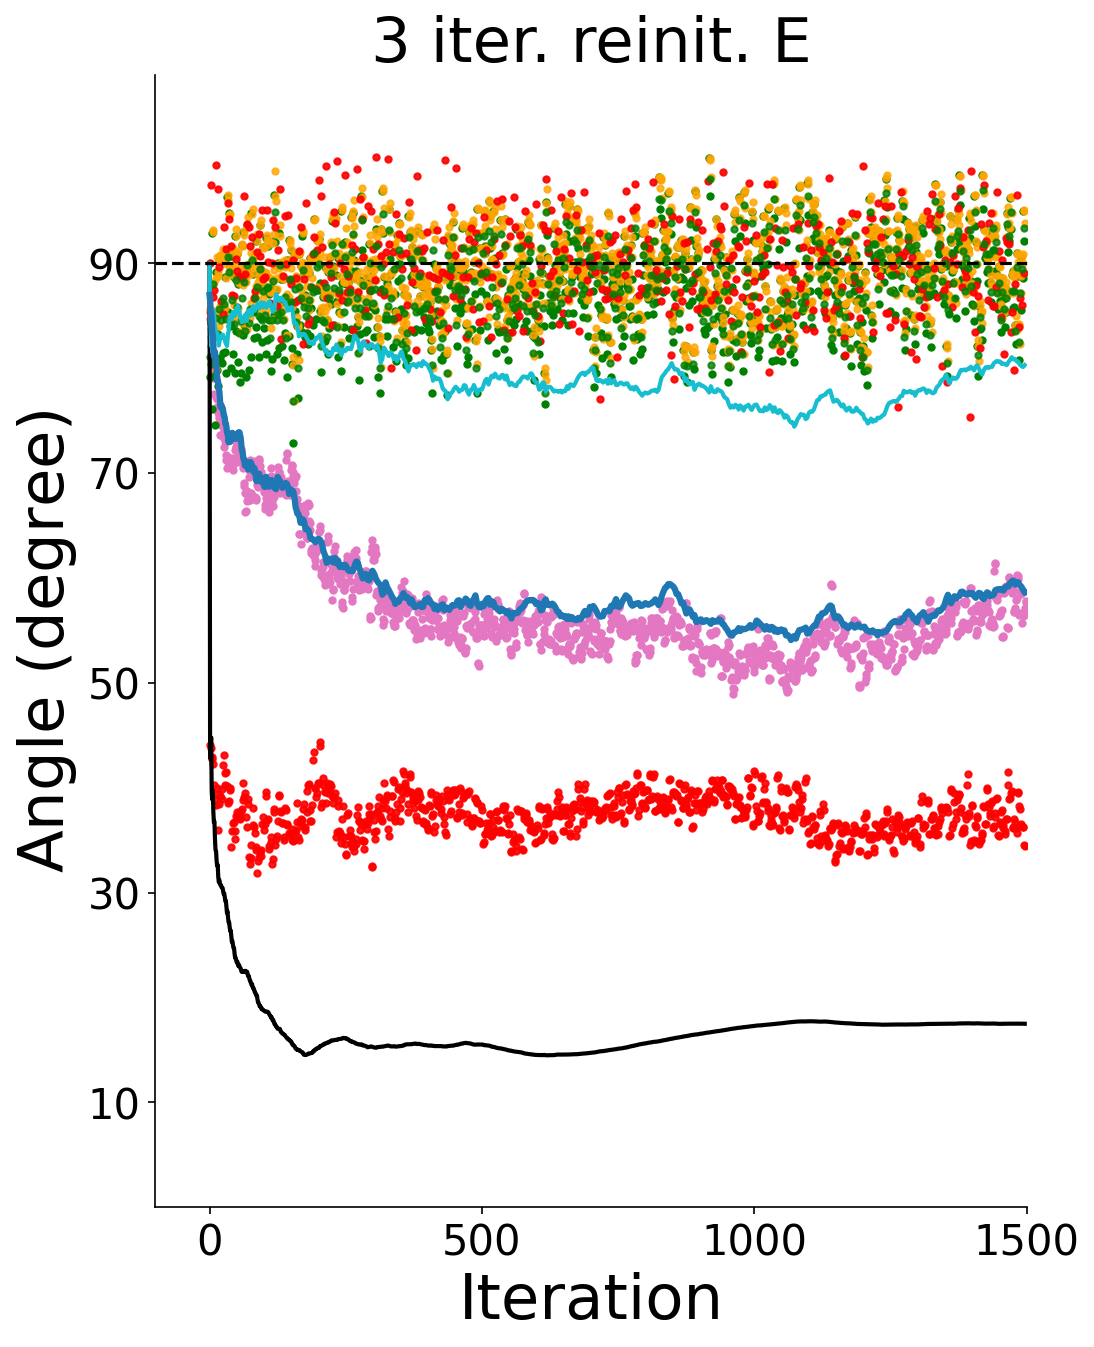

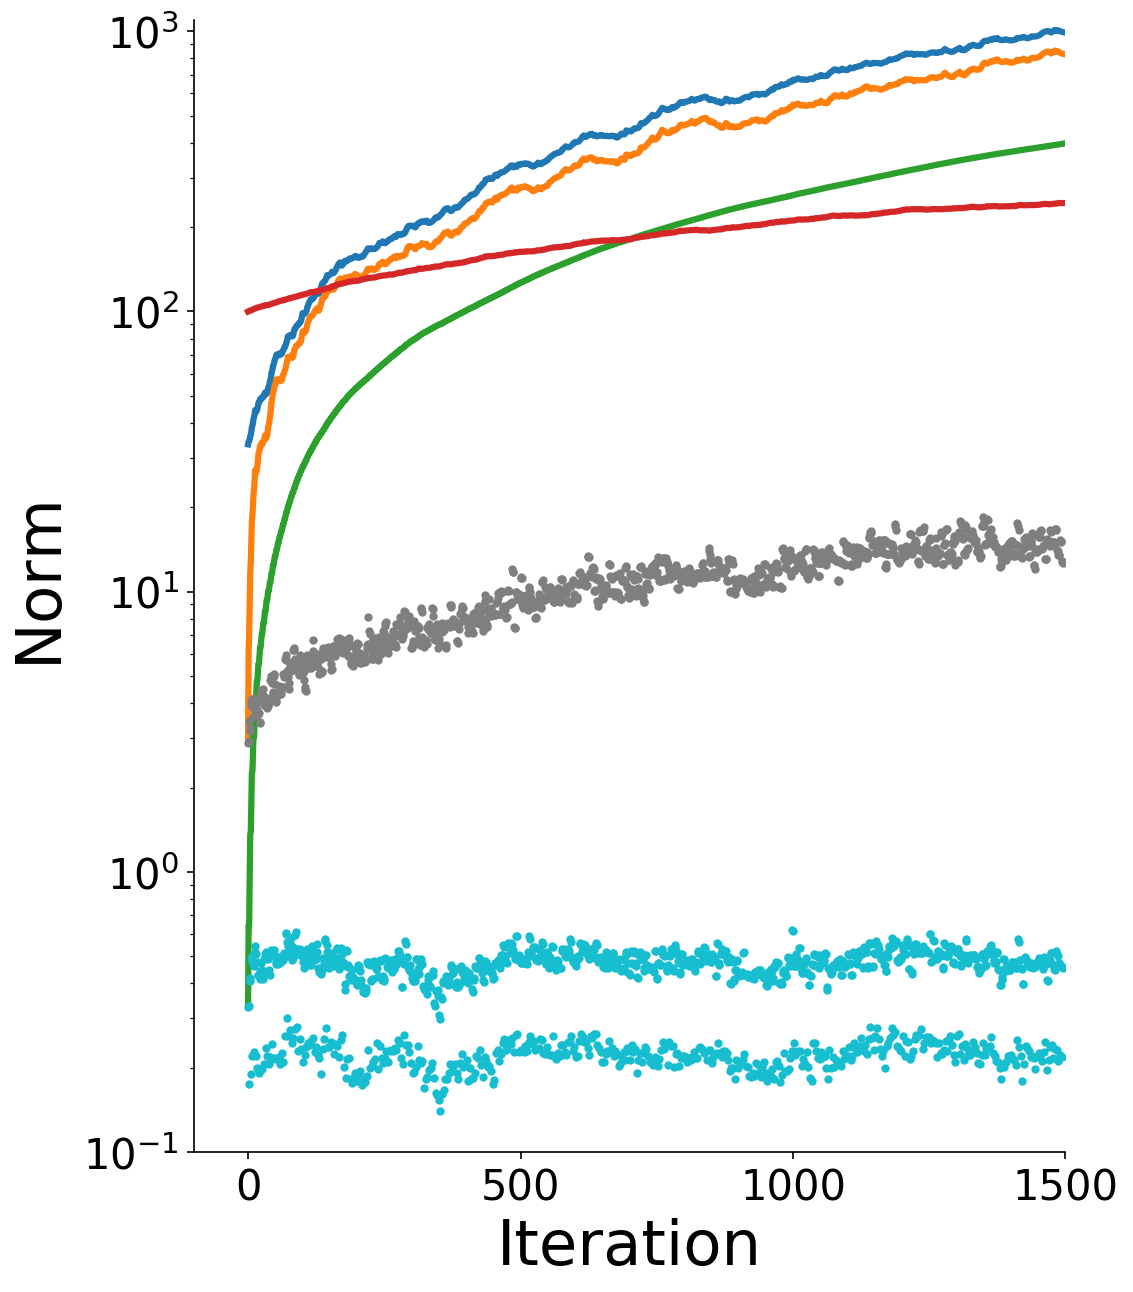

In [5]:




N_epoch = 1500
figsize__ = (7.5,10)


N_input = 100
N_hidden = 100
N_output = 10
N_batch = 100

lr = .002

W0 = (torch.randn([N_input , N_hidden])) 
W1 = (torch.randn([N_hidden , N_output]))  
B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 

angle_W1_B_list = []
angle_dW1_B_list = []

angle_W0_dw0_list = []
angle_W1_dw1_list = []

error_mean_list = []

error_mean_tensor = torch.zeros([N_output , N_epoch ])

loss_list = []

angle_dW0_bp_dW0_fa_list = []

angle_W0_W0_inf_list =[]
angle_W1_W1_inf_list =[]

alignment_term_SUM_angle_B_list  = []
supalignment_term_SUM_angle_B_list  = []


angle_dW1_W1_list = []

def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1

temp_list = []

norm_dw0_list = []
angle_W0_change_list = []
angle_E_change_list = []


E = torch.randn( [N_batch , N_output] )

E_list = []
delta0_list = []
delta1_list = []
W0_list = []
W1_list = []
L1_list = []
L2_list = []
Z1_list = []
Z2_list = []

norm_supalignment_term = []
norm_alignment_term = []

norm_W0 = []
norm_W1 = []




norm_SUM_supalignment_term = []
norm_SUM_alignment_term = []


dw1_dw1_angle_list = []

alignment_term_angle_B_list = []
sup_alignment_term_angle_B_list = []

alignment_term_angle_B_list.append(90)
sup_alignment_term_angle_B_list.append(90)
supalignment_term_SUM_angle_B_list.append(90)
alignment_term_SUM_angle_B_list.append(90)


alignment_term_sum = None
sup_alignment_term_sum = None

alignment_term_plus_supalignment_term_angle = []
for i in range(N_epoch):
  
  if i % 3 == 0:
    E = torch.randn( [N_batch , N_output] )
    # W0 = (torch.randn([N_input , N_hidden]))


  Z1 = torch.matmul(   X  ,  W0  )
  L1 = activation1( Z1 )
  Z2 = torch.matmul(   L1  ,  W1  )
  L2 = activation1(  Z2   )



  delta1 = torch.mul( E , derivative_activation1( Z2 )  ) 
  dw1 = lr* torch.matmul (  L1.t()  ,  delta1  )



  delta0 = torch.matmul (  delta1  ,  B  )
  delta0 = torch.mul (  delta0  ,  derivative_activation1(Z1)   )


  dw0 = lr* torch.matmul (     X.t()   ,    delta0  )

  
  W0 = W0 + dw0
  W1 = W1 + dw1


  delta0_bp = torch.matmul (  delta1  ,  W1.t()  )
  delta0_bp = torch.mul (  delta0_bp  ,  derivative_activation1(Z1)   )

  dw0_bp = lr* torch.matmul (     X.t()   ,    delta0_bp  )

  angle_dW0_bp_dW0_fa_list.append( my_weight.angle(dw0_bp ,dw0 )  )



  angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )
  angle_dW1_B_list.append(   my_weight.angle(  dw1  ,  B.t()   )   )
  angle_dW1_W1_list.append(   my_weight.angle(  dw1  ,  W1   )   ) 



  E_list .append(E)
  delta0_list .append( delta0 )
  delta1_list .append( delta1 )

  L1_list .append( L1 )
  L2_list .append( L2 )
  Z1_list .append( Z1 )
  Z2_list .append( Z2 )


  if i > 3 :

    W0_k   = W0
    W0_k_1 = W0_list[-1]
    W0_k_2 = W0_list[-2]

    W1_k   = W1
    W1_k_1 = W1_list[-1]
    W1_k_2 = W1_list[-2]

    delta0_k_1 = delta0_list[-1]
    delta0_k_2 = delta0_list[-2]

    delta1_k_1 = delta1_list[-1]
    delta1_k_2 = delta1_list[-2]

    W0_k = W0_k_1.t()  +  lr * torch.matmul(  delta0_k_1.t()   ,   X   )


    temp1q = torch.matmul(  W0_k_1.t()  , X.t() )
    temp1q = activation1( temp1q )
    temp1q = lr*torch.matmul(   temp1q  ,  delta1_k_1  )

  

    dw1_dw1_angle_list.append(  (  W0_k.t() -  W0 ).sum()   )
  


    temp1 = torch.matmul (  W0_list[-2].t()  ,  X.t() )
    temp1 =  derivative_activation1( temp1 )  

    temp2 = torch.matmul( delta1_list[-2]  , B )
    temp3 =  derivative_activation1( Z1_list[-2] )  
    temp2 = torch.mul(temp2 , temp3)
    temp4 = torch.matmul (    torch.matmul (  temp2 .t() , X   )  , X.t()  )
    temp4 = torch.mul( temp1  , temp4   )
    temp4 = lr*lr*torch.matmul (  temp4  ,  delta1_list[-1]  )
    alignment_term = temp4


    temp11 = torch.matmul ( W0_list[-2].t() , X.t() )
    temp11 = activation1 ( temp11  )
    temp11 = lr*torch.matmul (  temp11  ,  delta1_list[-1]  )
    sup_alignment_term = temp11

    if alignment_term_sum == None : alignment_term_sum = alignment_term 
    else:
      alignment_term_sum = alignment_term_sum + alignment_term 

    if sup_alignment_term_sum == None : sup_alignment_term_sum = sup_alignment_term 
    else:
      sup_alignment_term_sum = sup_alignment_term_sum + sup_alignment_term





    alignment_term_angle_B_list.append(   my_weight.angle( alignment_term  ,  B.t() )   )
    sup_alignment_term_angle_B_list.append(   my_weight.angle( sup_alignment_term  ,  B.t() )  )

    alignment_term_plus_supalignment_term_angle.append(   my_weight.angle( alignment_term + sup_alignment_term ,  B.t() )     )

    alignment_term_SUM_angle_B_list.append(   my_weight.angle( alignment_term_sum ,  B.t() )     )
    supalignment_term_SUM_angle_B_list.append(   my_weight.angle( sup_alignment_term_sum ,  B.t() )     )




    norm_W0 .append(  W0.norm() )
    norm_W1  .append(  W1.norm() )

    norm_SUM_supalignment_term .append(  sup_alignment_term_sum.norm() )
    norm_SUM_alignment_term .append(  alignment_term_sum.norm() )

    norm_supalignment_term .append(  sup_alignment_term.norm() )
    norm_alignment_term .append(  alignment_term.norm() )




    temp_list.append(  my_weight.angle ( alignment_term + sup_alignment_term , dw1 )  )

  W0_list.append( W0 )
  W1_list.append( W1 )





angle_W1_B_fixed_E = angle_W1_B_list  







plt.figure(num = None, figsize=figsize__, dpi=150, facecolor='w', edgecolor='k')



list_index1 = list ( range(0,len(alignment_term_plus_supalignment_term_angle) , 3) )
list_index2 = []

for i in range( len (alignment_term_plus_supalignment_term_angle) ):
  if not i in list_index1:
    list_index2.append(i)



plt.plot( angle_dW0_bp_dW0_fa_list  , '.' , label =  r"$\Delta W_{0,FA} \measuredangle \Delta W_{0,BP} $" 
         , alpha = 1 , color=my_cycle[-2] , markersize = 6 ,zorder=1 ) 

plt.plot( list_index2 , [alignment_term_plus_supalignment_term_angle[i] for i in list_index2]  , '.' , label =  r"$\Delta W_1 \measuredangle B^T $" , alpha = 1 , color='g' , markersize = 6 ,zorder=1 ) 


plt.plot( sup_alignment_term_angle_B_list   , '.' , label =  r"$T_{subalign} \measuredangle B^T $" , alpha = 0.8 , color='orange' , markersize = 6 ,zorder=1) 
plt.plot( alignment_term_angle_B_list  , '.' , label = r"$T_{align} \measuredangle B^T $" , alpha = 0.9 , color='r' , markersize = 6 ,zorder = 1 ) 



plt.plot( list_index1 , [alignment_term_plus_supalignment_term_angle[i] for i in list_index1]  , '.' , label =  r"$\Delta W_1 \measuredangle B^T $" , alpha = 0.8 , color='g' , markersize = 6 ,zorder=1 ) 



plt.plot( alignment_term_SUM_angle_B_list   , '-' , label =  r"$\sum T_{align} \measuredangle B^T  $" , alpha = 1  , linewidth = 2 , color= 'k' ) 
plt.plot( supalignment_term_SUM_angle_B_list   , '-' , label =  r"$\sum T_{subalign} \measuredangle B^T $" , alpha = 1  , linewidth = 2 , color= my_cycle[5]  ) 
plt.plot( angle_W1_B_fixed_E  , '-' , label = r"$W_1 \measuredangle B^T $" , linewidth = 3 , color = my_cycle[0] ) 



plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$Angle\ (degree)$", fontsize= plt_fontsize_label_)

plt.hlines( y=90 , xmin=-100 , xmax=N_epoch  , linestyle = '--' , zorder = 100)


plt.title('3 iter. reinit. E' , fontsize= plt_fontsize_label_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(0,108)
plt.xlim(-100 ,N_epoch)
plt.yticks([10,30 ,50 ,70 ,90])
plt.savefig(base_directory_figure_str + '/3 iter. reinit. E   _angle.jpg' , dpi=300  , bbox_inches='tight'  ) 

plt.show()





plt.figure(num = None, figsize=figsize__, dpi=150, facecolor='w', edgecolor='k')





plt.plot( norm_W1  , '-' , label = r"$\Vert W_1 \Vert_{_2}$"  , linewidth = 3  , color= my_cycle[0] ) 


plt.plot( norm_SUM_supalignment_term  , '-' , label = r"$\Vert \sum T_{supalign} \Vert_{_2}$"  , linewidth = 3 , color= my_cycle[1]  ) 
plt.plot( norm_SUM_alignment_term  , '-' , label = r"$\Vert \sum T_{align} \Vert_{_2}$", linewidth = 3  , color= my_cycle[2] ) 

plt.plot( norm_W0  , '-' , label = r"$\Vert W_0 \Vert_{_2}$" , linewidth = 3, color= my_cycle[3] ) 




plt.plot( norm_supalignment_term  , '.' , label = r"$\Vert T_{supalign} \Vert_{_2}$"  , linewidth = 3 , color= my_cycle[4] ) 
plt.plot( norm_alignment_term  , '.' , label = r"$\Vert T_{align} \Vert_{_2}$", linewidth = 3  , color= my_cycle[5]) 

plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$Norm$", fontsize= plt_fontsize_label_)


    
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim( 0.1 , 1100)
plt.yscale('log')
plt.savefig(base_directory_figure_str + '/3 iter. reinit. E   _norm.jpg' , dpi=300  , bbox_inches='tight'  ) 

plt.xlim(-100 ,N_epoch)

plt.show()




# 3 iter. reinit. E + Normalization

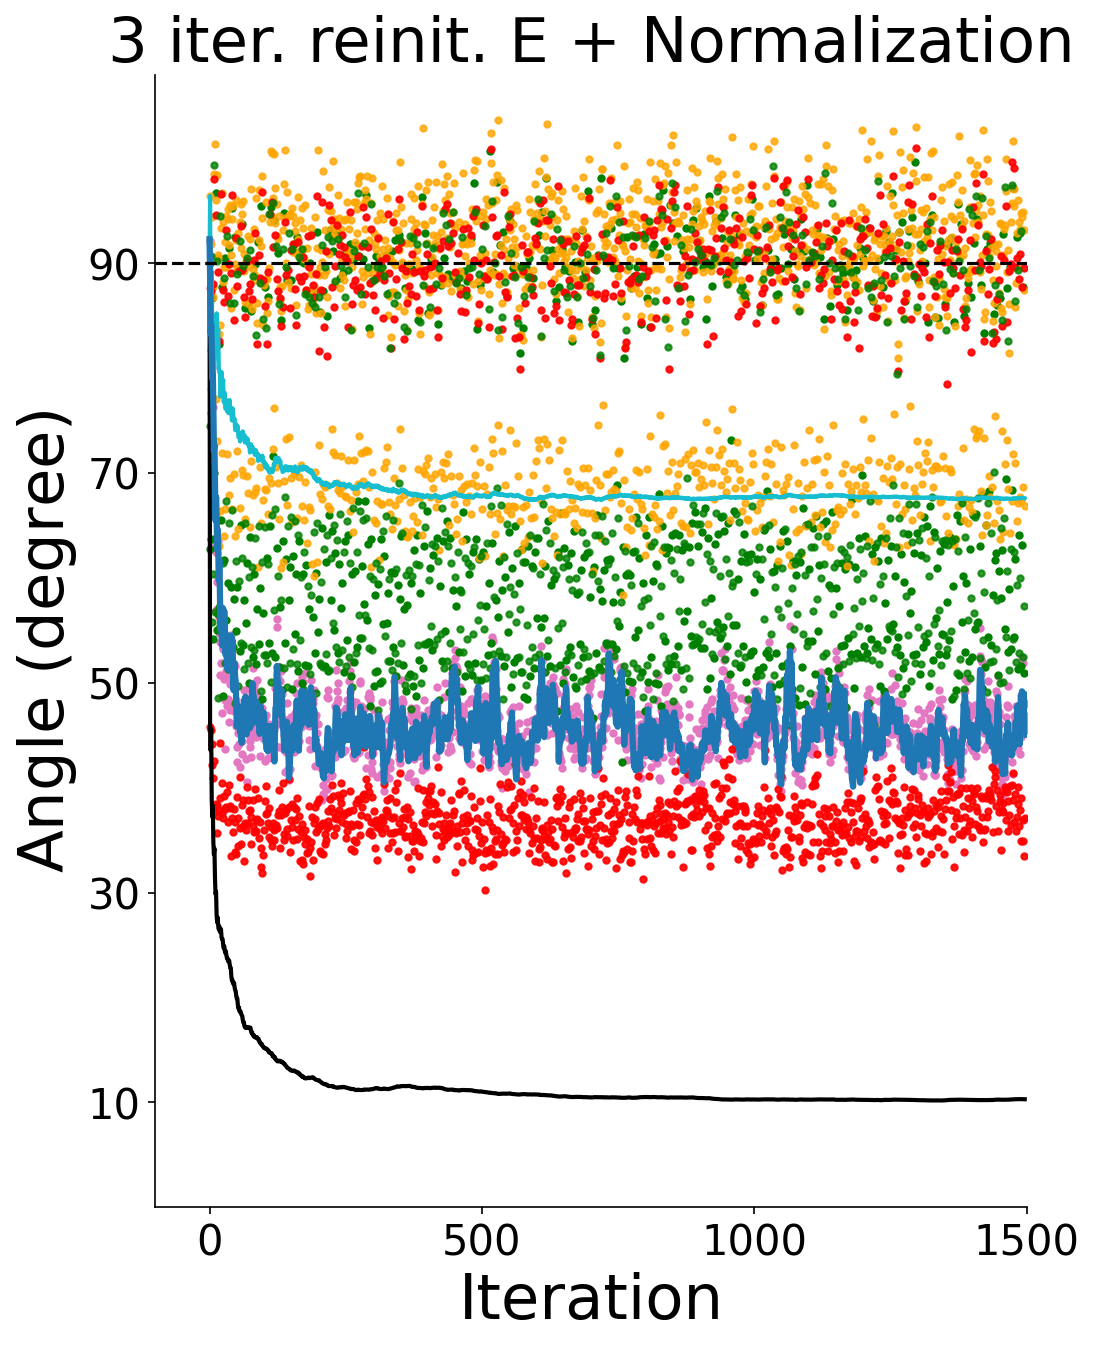

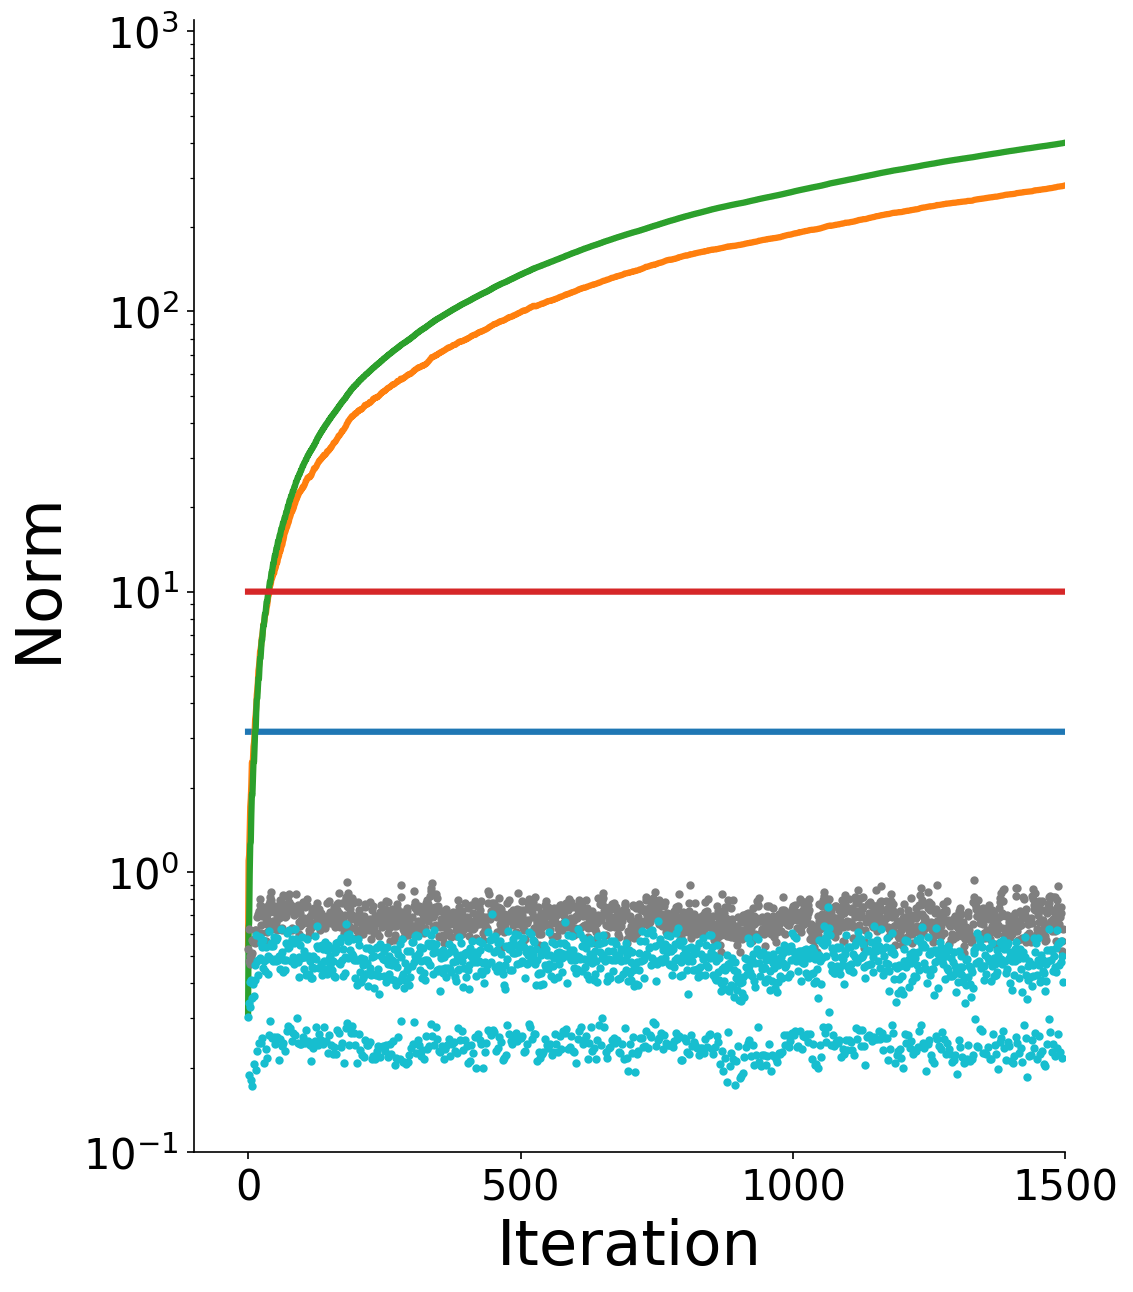

In [6]:

N_epoch = 1500
figsize__ = (7.5,10)

N_input = 100
N_hidden = 100
N_output = 10
N_batch = 100

lr = .002

W0 = (torch.randn([N_input , N_hidden])) 
W1 = (torch.randn([N_hidden , N_output]))  
B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 

angle_W1_B_list = []
angle_dW1_B_list = []

angle_W0_dw0_list = []
angle_W1_dw1_list = []

error_mean_list = []

error_mean_tensor = torch.zeros([N_output , N_epoch ])

loss_list = []

angle_dW0_bp_dW0_fa_list = []

angle_W0_W0_inf_list =[]
angle_W1_W1_inf_list =[]

alignment_term_SUM_angle_B_list  = []
supalignment_term_SUM_angle_B_list  = []




angle_dW1_W1_list = []

def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1


temp_list = []

norm_dw0_list = []
angle_W0_change_list = []
angle_E_change_list = []


E = torch.randn( [N_batch , N_output] )

E_list = []
delta0_list = []
delta1_list = []
W0_list = []
W1_list = []
L1_list = []
L2_list = []
Z1_list = []
Z2_list = []

norm_supalignment_term = []
norm_alignment_term = []

norm_W0 = []
norm_W1 = []


initial_norm_W0 = 1
initial_norm_W1 = 1



W0 = torch.div( W0 ,  W0.norm(dim=0).view( [1,-1] )  )  * initial_norm_W0
W1 = torch.div( W1 ,  W1.norm(dim=0).view( [1,-1] )  )  * initial_norm_W1



norm_SUM_supalignment_term = []
norm_SUM_alignment_term = []


dw1_dw1_angle_list = []

alignment_term_angle_B_list = []
sup_alignment_term_angle_B_list = []

alignment_term_angle_B_list.append(90)
sup_alignment_term_angle_B_list.append(90)
supalignment_term_SUM_angle_B_list.append(90)
alignment_term_SUM_angle_B_list.append(90)


alignment_term_sum = None
sup_alignment_term_sum = None

alignment_term_plus_supalignment_term_angle = []

E = torch.randn( [N_batch , N_output] )

for i in range(N_epoch):
  
  if i % 3 == 0:
    E = torch.randn( [N_batch , N_output] )



  Z1 = torch.matmul(   X  ,  W0  )
  L1 = activation1( Z1 )
  Z2 = torch.matmul(   L1  ,  W1  )
  L2 = activation1(  Z2   )



  delta1 = torch.mul( E , derivative_activation1( Z2 )  ) 
  dw1 = lr* torch.matmul (  L1.t()  ,  delta1  )



  delta0 = torch.matmul (  delta1  ,  B  )
  delta0 = torch.mul (  delta0  ,  derivative_activation1(Z1)   )


  dw0 = lr* torch.matmul (     X.t()   ,    delta0  )

  
  W0 = W0 + dw0
  W1 = W1 + dw1


  delta0_bp = torch.matmul (  delta1  ,  W1.t()  )
  delta0_bp = torch.mul (  delta0_bp  ,  derivative_activation1(Z1)   )

  # B = torch.randn([N_output , N_hidden])
  dw0_bp = lr* torch.matmul (     X.t()   ,    delta0_bp  )

  angle_dW0_bp_dW0_fa_list.append( my_weight.angle(dw0_bp ,dw0 )  )



  angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )
  angle_dW1_B_list.append(   my_weight.angle(  dw1  ,  B.t()   )   )
  angle_dW1_W1_list.append(   my_weight.angle(  dw1  ,  W1   )   ) 



  E_list .append(E)
  delta0_list .append( delta0 )
  delta1_list .append( delta1 )

  L1_list .append( L1 )
  L2_list .append( L2 )
  Z1_list .append( Z1 )
  Z2_list .append( Z2 )


  if i > 3 :

    W0_k   = W0
    W0_k_1 = W0_list[-1]
    W0_k_2 = W0_list[-2]

    W1_k   = W1
    W1_k_1 = W1_list[-1]
    W1_k_2 = W1_list[-2]

    delta0_k_1 = delta0_list[-1]
    delta0_k_2 = delta0_list[-2]

    delta1_k_1 = delta1_list[-1]
    delta1_k_2 = delta1_list[-2]

    W0_k = W0_k_1.t()  +  lr * torch.matmul(  delta0_k_1.t()   ,   X   )


    temp1q = torch.matmul(  W0_k_1.t()  , X.t() )
    temp1q = activation1( temp1q )
    temp1q = lr*torch.matmul(   temp1q  ,  delta1_k_1  )



    dw1_dw1_angle_list.append(  (  W0_k.t() -  W0 ).sum()   )



    temp1 = torch.matmul (  W0_list[-2].t()  ,  X.t() )
    temp1 =  derivative_activation1( temp1 )  

    temp2 = torch.matmul( delta1_list[-2]  , B )
    temp3 =  derivative_activation1( Z1_list[-2] )  
    temp2 = torch.mul(temp2 , temp3)
    temp4 = torch.matmul (    torch.matmul (  temp2 .t() , X   )  , X.t()  )
    temp4 = torch.mul( temp1  , temp4   )
    temp4 = lr*lr*torch.matmul (  temp4  ,  delta1_list[-1]  )
    alignment_term = temp4


    temp11 = torch.matmul ( W0_list[-2].t() , X.t() )
    temp11 = activation1 ( temp11  )
    temp11 = lr*torch.matmul (  temp11  ,  delta1_list[-1]  )
    sup_alignment_term = temp11
 
    if alignment_term_sum == None : alignment_term_sum = alignment_term 
    else:
      alignment_term_sum = alignment_term_sum + alignment_term 

    if sup_alignment_term_sum == None : sup_alignment_term_sum = sup_alignment_term 
    else:
      sup_alignment_term_sum = sup_alignment_term_sum + sup_alignment_term


 


    alignment_term_angle_B_list.append(   my_weight.angle( alignment_term  ,  B.t() )   )
    sup_alignment_term_angle_B_list.append(   my_weight.angle( sup_alignment_term  ,  B.t() )  )

    alignment_term_plus_supalignment_term_angle.append(   my_weight.angle( alignment_term + sup_alignment_term ,  B.t() )     )

    alignment_term_SUM_angle_B_list.append(   my_weight.angle( alignment_term_sum ,  B.t() )     )
    supalignment_term_SUM_angle_B_list.append(   my_weight.angle( sup_alignment_term_sum ,  B.t() )     )


    W0 = torch.div( W0 ,  W0.norm(dim=0).view( [1,-1] )  )  * initial_norm_W0
    W1 = torch.div( W1 ,  W1.norm(dim=0).view( [1,-1] )  )  * initial_norm_W1


    norm_W0 .append(  W0.norm() )
    norm_W1  .append(  W1.norm() )

    norm_SUM_supalignment_term .append(  sup_alignment_term_sum.norm() )
    norm_SUM_alignment_term .append(  alignment_term_sum.norm() )


    norm_supalignment_term .append(  sup_alignment_term.norm() )
    norm_alignment_term .append(  alignment_term.norm() )




    temp_list.append(  my_weight.angle ( alignment_term + sup_alignment_term , dw1 )  )


  W0_list.append( W0 )
  W1_list.append( W1 )





angle_W1_B_fixed_E = angle_W1_B_list  




plt.figure(num = None, figsize=figsize__, dpi=150, facecolor='w', edgecolor='k')



list_index1 = list ( range(0,len(alignment_term_plus_supalignment_term_angle) , 2) )
list_index2 = []

for i in range( len (alignment_term_plus_supalignment_term_angle) ):
  if not i in list_index1:
    list_index2.append(i)


plt.plot( angle_dW0_bp_dW0_fa_list  , '.' , label =  r"$\Delta W_{0,FA} \measuredangle \Delta W_{0,BP} $" 
         , alpha = 1 , color=my_cycle[-2] , markersize = 6 ,zorder=1 ) 


plt.plot( list_index2 , [alignment_term_plus_supalignment_term_angle[i] for i in list_index2]  , '.' , label =  r"$\Delta W_1 \measuredangle B^T $" , alpha = 1 , color='g' , markersize = 6 ,zorder=1 ) 


plt.plot( sup_alignment_term_angle_B_list   , '.' , label =  r"$T_{subalign} \measuredangle B^T $" , alpha = 0.8 , color='orange' , markersize = 6 ,zorder=1) 
plt.plot( alignment_term_angle_B_list  , '.' , label = r"$T_{align} \measuredangle B^T $" , alpha = 0.9 , color='r' , markersize = 6 ,zorder = 1 ) 




plt.plot( list_index1 , [alignment_term_plus_supalignment_term_angle[i] for i in list_index1]  , '.' , label =  r"$\Delta W_1 \measuredangle B^T $" , alpha = 0.8 , color='g' , markersize = 6 ,zorder=1 ) 




plt.plot( alignment_term_SUM_angle_B_list   , '-' , label =  r"$\sum T_{align} \measuredangle B^T  $" , alpha = 1  , linewidth = 2 , color= 'k' ) 
plt.plot( supalignment_term_SUM_angle_B_list   , '-' , label =  r"$\sum T_{subalign} \measuredangle B^T $" , alpha = 1  , linewidth = 2 , color= my_cycle[5]  ) 
plt.plot( angle_W1_B_fixed_E  , '-' , label = r"$W_1 \measuredangle B^T $" , linewidth = 3 , color = my_cycle[0] ) 



plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$Angle\ (degree)$", fontsize= plt_fontsize_label_)

plt.hlines( y=90 , xmin=-100 , xmax=N_epoch  , linestyle = '--' , zorder = 100)




plt.title('3 iter. reinit. E + Normalization' , fontsize= plt_fontsize_label_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(0,108)
plt.xlim(-100 ,N_epoch)
plt.yticks([10,30 ,50 ,70 ,90])
plt.savefig( base_directory_figure_str + '/3 iter. reinit. E  Normalization _angle.jpg' , dpi=300  , bbox_inches='tight'  ) 

plt.show()





plt.figure(num = None, figsize=figsize__, dpi=150, facecolor='w', edgecolor='k')





plt.plot( norm_W1  , '-' , label = r"$\Vert W_1 \Vert_{_2}$"  , linewidth = 3  , color= my_cycle[0] ) 


plt.plot( norm_SUM_supalignment_term  , '-' , label = r"$\Vert \sum T_{supalign} \Vert_{_2}$"  , linewidth = 3  , color= my_cycle[1]  ) 
plt.plot( norm_SUM_alignment_term  , '-' , label = r"$\Vert \sum T_{align} \Vert_{_2}$", linewidth = 3  , color= my_cycle[2] ) 

plt.plot( norm_W0  , '-' , label = r"$\Vert W_0 \Vert_{_2}$" , linewidth = 3 , color= my_cycle[3] ) 




plt.plot( norm_supalignment_term  , '.' , label = r"$\Vert T_{supalign} \Vert_{_2}$"  , linewidth = 3 , color= my_cycle[4] ) 
plt.plot( norm_alignment_term  , '.' , label = r"$\Vert T_{align} \Vert_{_2}$", linewidth = 3  , color= my_cycle[5]) 

plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$Norm$", fontsize= plt_fontsize_label_)




    
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim( 0.1 , 1100)
plt.yscale('log')
plt.savefig(base_directory_figure_str + '/3 iter. reinit. E  Normalization _norm.jpg' , dpi=300 , bbox_inches='tight'  ) 

plt.xlim(-100 ,N_epoch)

plt.show()




#  2 iter. reinit. E + Normalization 1

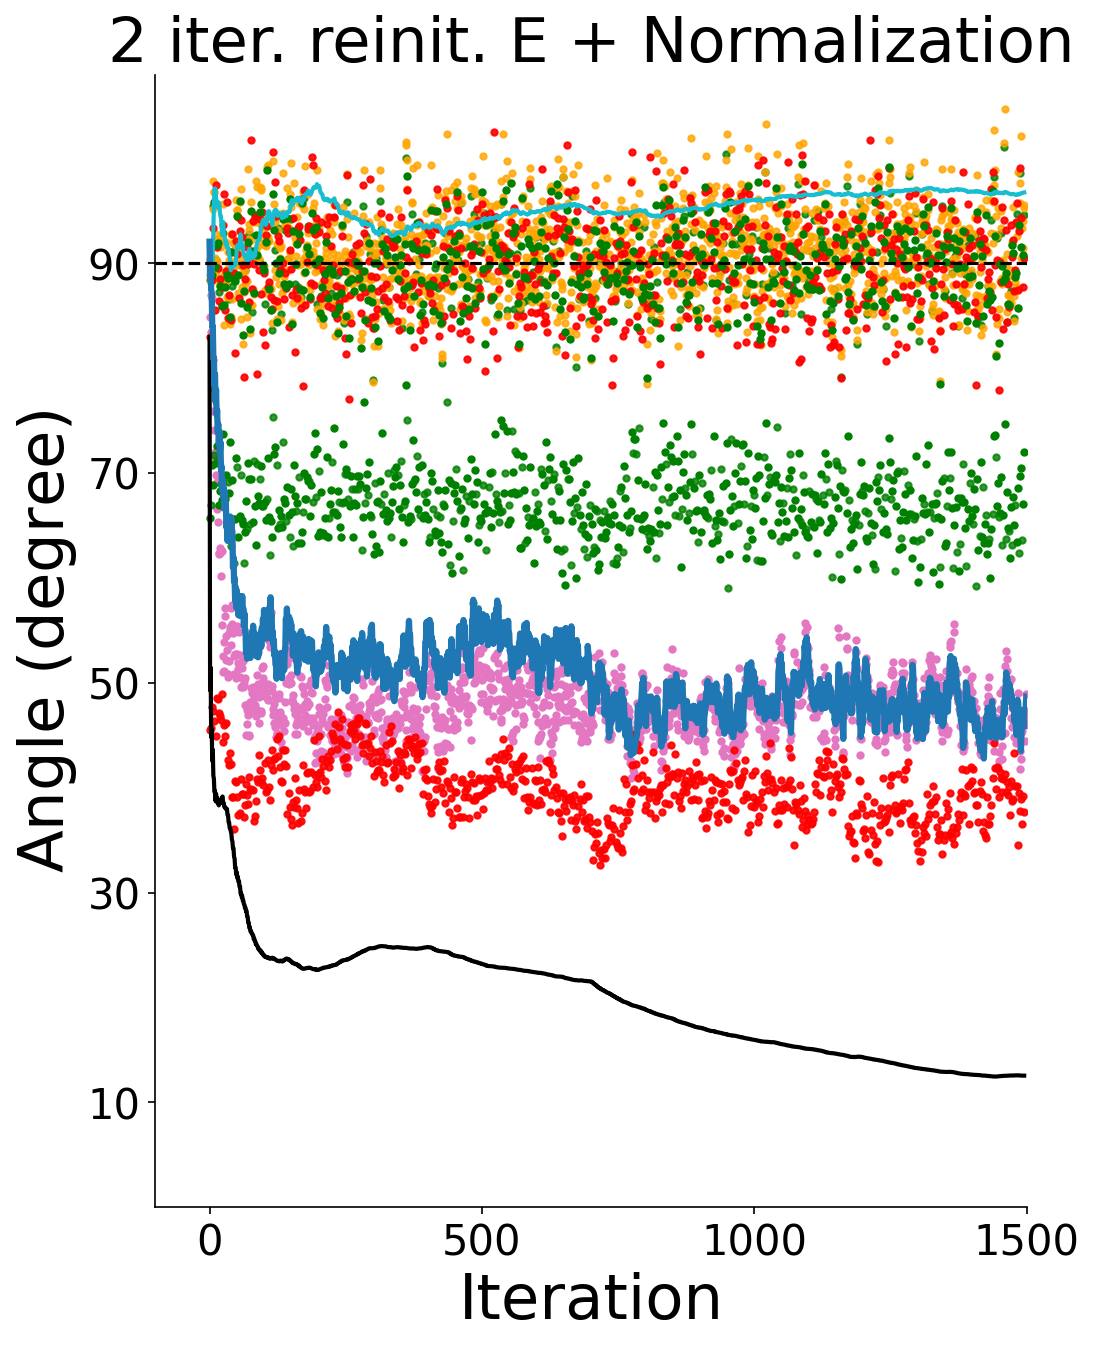

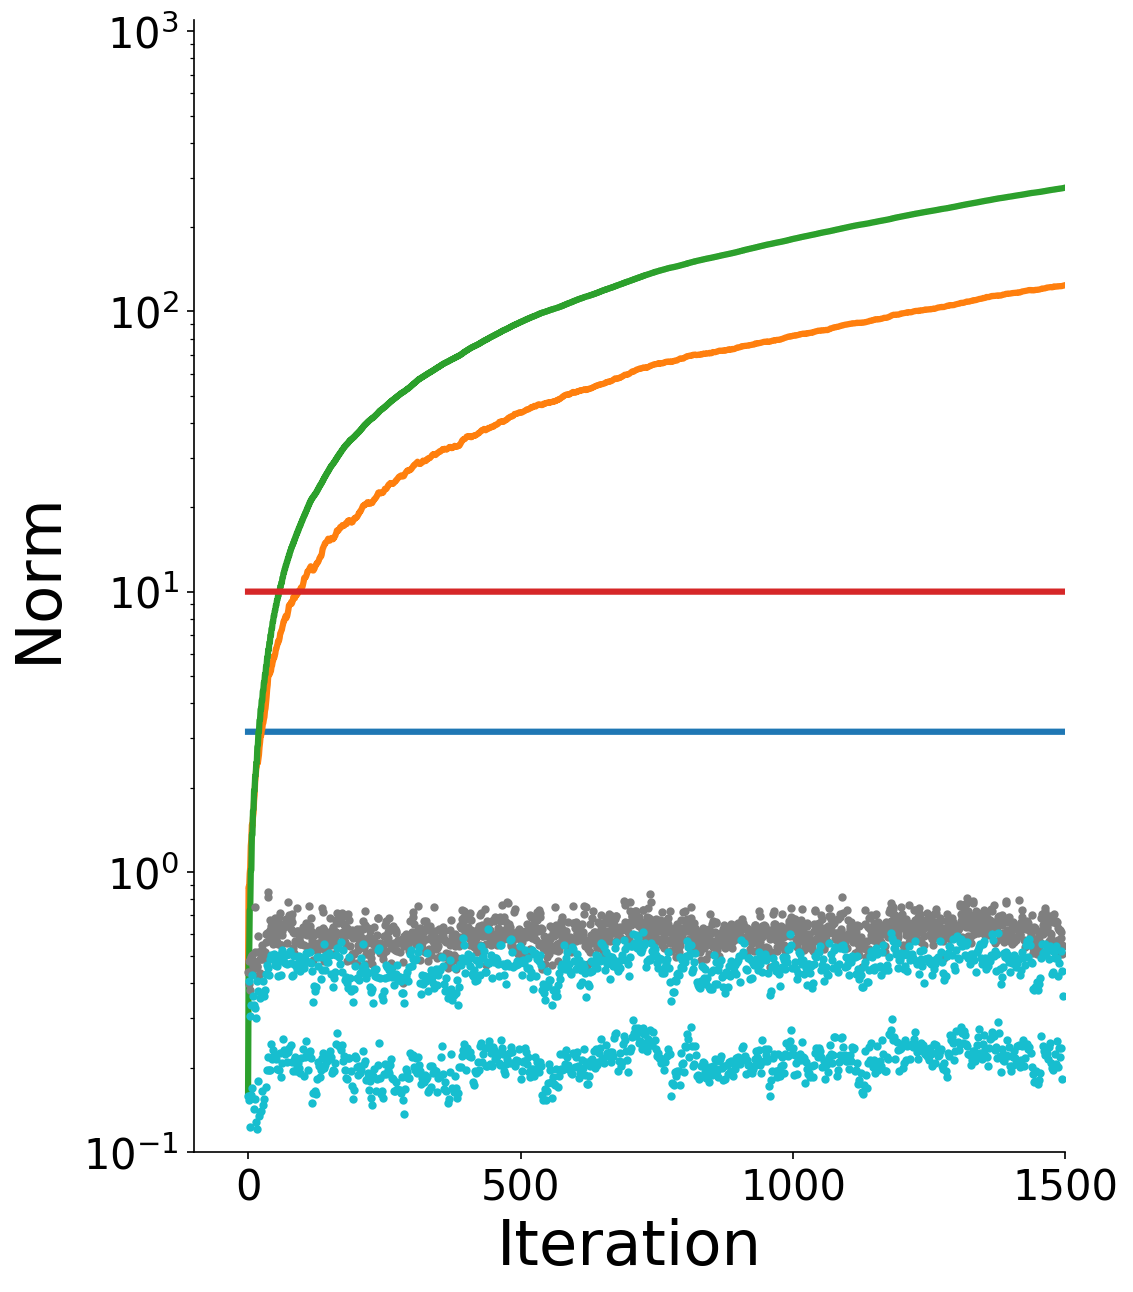

In [7]:




N_epoch = 1500
figsize__ = (7.5,10)

N_input = 100
N_hidden = 100
N_output = 10
N_batch = 100

lr = .002

W0 = (torch.randn([N_input , N_hidden])) 
W1 = (torch.randn([N_hidden , N_output]))  
B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 

angle_W1_B_list = []
angle_dW1_B_list = []

angle_W0_dw0_list = []
angle_W1_dw1_list = []

error_mean_list = []

error_mean_tensor = torch.zeros([N_output , N_epoch ])

loss_list = []

angle_dW0_bp_dW0_fa_list = []

angle_W0_W0_inf_list =[]
angle_W1_W1_inf_list =[]

alignment_term_SUM_angle_B_list  = []
supalignment_term_SUM_angle_B_list  = []


angle_dW1_W1_list = []

def activation1(x):
 
  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):
  
  return ( x >= 0  ) * 1

temp_list = []

norm_dw0_list = []
angle_W0_change_list = []
angle_E_change_list = []


E = torch.randn( [N_batch , N_output] )

E_list = []
delta0_list = []
delta1_list = []
W0_list = []
W1_list = []
L1_list = []
L2_list = []
Z1_list = []
Z2_list = []


norm_supalignment_term = []
norm_alignment_term = []

norm_W0 = []
norm_W1 = []


initial_norm_W0 = 1
initial_norm_W1 = 1



W0 = torch.div( W0 ,  W0.norm(dim=0).view( [1,-1] )  )  * initial_norm_W0
W1 = torch.div( W1 ,  W1.norm(dim=0).view( [1,-1] )  )  * initial_norm_W1




norm_SUM_supalignment_term = []
norm_SUM_alignment_term = []


dw1_dw1_angle_list = []

alignment_term_angle_B_list = []
sup_alignment_term_angle_B_list = []


alignment_term_sum = None
sup_alignment_term_sum = None

alignment_term_plus_supalignment_term_angle = []
for i in range(N_epoch):
  
  if i % 2 == 0:
    E = torch.randn( [N_batch , N_output] )



  Z1 = torch.matmul(   X  ,  W0  )
  L1 = activation1( Z1 )
  Z2 = torch.matmul(   L1  ,  W1  )
  L2 = activation1(  Z2   )



  delta1 = torch.mul( E , derivative_activation1( Z2 )  ) 
  dw1 = lr* torch.matmul (  L1.t()  ,  delta1  )



  delta0 = torch.matmul (  delta1  ,  B  )
  delta0 = torch.mul (  delta0  ,  derivative_activation1(Z1)   )


  dw0 = lr* torch.matmul (     X.t()   ,    delta0  )

  
  W0 = W0 + dw0
  W1 = W1 + dw1


  delta0_bp = torch.matmul (  delta1  ,  W1.t()  )
  delta0_bp = torch.mul (  delta0_bp  ,  derivative_activation1(Z1)   )


  dw0_bp = lr* torch.matmul (     X.t()   ,    delta0_bp  )

  angle_dW0_bp_dW0_fa_list.append( my_weight.angle(dw0_bp ,dw0 )  )



  angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )
  angle_dW1_B_list.append(   my_weight.angle(  dw1  ,  B.t()   )   )
  angle_dW1_W1_list.append(   my_weight.angle(  dw1  ,  W1   )   ) 



  E_list .append(E)
  delta0_list .append( delta0 )
  delta1_list .append( delta1 )

  L1_list .append( L1 )
  L2_list .append( L2 )
  Z1_list .append( Z1 )
  Z2_list .append( Z2 )


  if i > 3 :

    W0_k   = W0
    W0_k_1 = W0_list[-1]
    W0_k_2 = W0_list[-2]

    W1_k   = W1
    W1_k_1 = W1_list[-1]
    W1_k_2 = W1_list[-2]

    delta0_k_1 = delta0_list[-1]
    delta0_k_2 = delta0_list[-2]

    delta1_k_1 = delta1_list[-1]
    delta1_k_2 = delta1_list[-2]

    W0_k = W0_k_1.t()  +  lr * torch.matmul(  delta0_k_1.t()   ,   X   )


    temp1q = torch.matmul(  W0_k_1.t()  , X.t() )
    temp1q = activation1( temp1q )
    temp1q = lr*torch.matmul(   temp1q  ,  delta1_k_1  )

   

    dw1_dw1_angle_list.append(  (  W0_k.t() -  W0 ).sum()   )


    temp1 = torch.matmul (  W0_list[-2].t()  ,  X.t() )
    temp1 =  derivative_activation1( temp1 )  

    temp2 = torch.matmul( delta1_list[-2]  , B )
    temp3 =  derivative_activation1( Z1_list[-2] )  
    temp2 = torch.mul(temp2 , temp3)
    temp4 = torch.matmul (    torch.matmul (  temp2 .t() , X   )  , X.t()  )
    temp4 = torch.mul( temp1  , temp4   )
    temp4 = lr*lr*torch.matmul (  temp4  ,  delta1_list[-1]  )
    alignment_term = temp4


    temp11 = torch.matmul ( W0_list[-2].t() , X.t() )
    temp11 = activation1 ( temp11  )
    temp11 = lr*torch.matmul (  temp11  ,  delta1_list[-1]  )
    sup_alignment_term = temp11


    if alignment_term_sum == None : alignment_term_sum = alignment_term 
    else:
      alignment_term_sum = alignment_term_sum + alignment_term 

    if sup_alignment_term_sum == None : sup_alignment_term_sum = sup_alignment_term 
    else:
      sup_alignment_term_sum = sup_alignment_term_sum + sup_alignment_term




    alignment_term_angle_B_list.append(   my_weight.angle( alignment_term  ,  B.t() )   )
    sup_alignment_term_angle_B_list.append(   my_weight.angle( sup_alignment_term  ,  B.t() )  )

    alignment_term_plus_supalignment_term_angle.append(   my_weight.angle( dw1 ,  B.t() )     )

    alignment_term_SUM_angle_B_list.append(   my_weight.angle( alignment_term_sum ,  B.t() )     )
    supalignment_term_SUM_angle_B_list.append(   my_weight.angle( sup_alignment_term_sum ,  B.t() )     )



    W0 = torch.div( W0 ,  W0.norm(dim=0).view( [1,-1] )  )  * initial_norm_W0
    W1 = torch.div( W1 ,  W1.norm(dim=0).view( [1,-1] )  )  * initial_norm_W1



    norm_W0 .append(  W0.norm() )
    norm_W1  .append(  W1.norm() )

    norm_SUM_supalignment_term .append(  sup_alignment_term_sum.norm() )
    norm_SUM_alignment_term .append(  alignment_term_sum.norm() )

    norm_supalignment_term .append(  sup_alignment_term.norm() )
    norm_alignment_term .append(  alignment_term.norm() )




    temp_list.append(  my_weight.angle ( alignment_term + sup_alignment_term , dw1 )  )

  W0_list.append( W0 )
  W1_list.append( W1 )





angle_W1_B_fixed_E = angle_W1_B_list  




plt.figure(num = None, figsize=figsize__, dpi=150, facecolor='w', edgecolor='k')




list_index1 = list ( range(0,len(alignment_term_plus_supalignment_term_angle) , 3) )
list_index2 = []

for i in range( len (alignment_term_plus_supalignment_term_angle) ):
  if not i in list_index1:
    list_index2.append(i)




plt.plot( angle_dW0_bp_dW0_fa_list  , '.' , label =  r"$\Delta W_{0,FA} \measuredangle \Delta W_{0,BP} $" 
         , alpha = 1 , color=my_cycle[-2] , markersize = 6 ,zorder=1 ) 

plt.plot( list_index1 , [alignment_term_plus_supalignment_term_angle[i] for i in list_index1]  , '.' , label =  r"$\Delta W_1 \measuredangle B^T $" , alpha = 0.8 , color='g' , markersize = 6 ,zorder=1 ) 

plt.plot( sup_alignment_term_angle_B_list   , '.' , label =  r"$T_{subalign} \measuredangle B^T $" , alpha = 0.8 , color='orange' , markersize = 6 ,zorder=1) 
plt.plot( alignment_term_angle_B_list  , '.' , label = r"$T_{align} \measuredangle B^T $" , alpha = 0.9 , color='r' , markersize = 6 ,zorder = 1 ) 


plt.plot( list_index2 , [alignment_term_plus_supalignment_term_angle[i] for i in list_index2]  , '.' , label =  r"$\Delta W_1 \measuredangle B^T $" , alpha = 1 , color='g' , markersize = 6 ,zorder=1 ) 


plt.plot( alignment_term_SUM_angle_B_list   , '-' , label =  r"$\sum T_{align} \measuredangle B^T  $" , alpha = 1  , linewidth = 2 , color= 'k' ) 
plt.plot( supalignment_term_SUM_angle_B_list   , '-' , label =  r"$\sum T_{subalign} \measuredangle B^T $" , alpha = 1  , linewidth = 2 , color= my_cycle[5]  ) 
plt.plot( angle_W1_B_fixed_E  , '-' , label = r"$W_1 \measuredangle B^T $" , linewidth = 3 , color = my_cycle[0] ) 



plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$Angle\ (degree)$", fontsize= plt_fontsize_label_)

plt.hlines( y=90 , xmin=-100 , xmax=N_epoch  , linestyle = '--' , zorder = 100)



plt.title('2 iter. reinit. E + Normalization' , fontsize= plt_fontsize_label_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(0,108)
plt.xlim(-100 ,N_epoch)
plt.yticks([10,30 ,50 ,70 ,90])
plt.savefig(base_directory_figure_str + '/2 iter. reinit. E  Normalization _angle.jpg' , dpi=300 , bbox_inches='tight'  ) 






plt.show()






plt.figure(num = None, figsize=figsize__, dpi=150, facecolor='w', edgecolor='k')




plt.plot( norm_W1  , '-' , label = r"$\Vert W_1 \Vert_{_2}$"  , linewidth = 3  , color= my_cycle[0] ) 


plt.plot( norm_SUM_supalignment_term  , '-' , label = r"$\Vert \sum T_{supalign} \Vert_{_2}$"  , linewidth =3  , color= my_cycle[1]  ) 
plt.plot( norm_SUM_alignment_term  , '-' , label = r"$\Vert \sum T_{align} \Vert_{_2}$", linewidth = 3  , color= my_cycle[2] ) 

plt.plot( norm_W0  , '-' , label = r"$\Vert W_0 \Vert_{_2}$" , linewidth = 3 , color= my_cycle[3] ) 




plt.plot( norm_supalignment_term  , '.' , label = r"$\Vert T_{supalign} \Vert_{_2}$"  , linewidth = 3 , color= my_cycle[4] ) 
plt.plot( norm_alignment_term  , '.' , label = r"$\Vert T_{align} \Vert_{_2}$", linewidth = 3  , color= my_cycle[5]) 


plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$Norm$", fontsize= plt_fontsize_label_)


ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim( 0.1 , 1100)
plt.yscale('log')
plt.savefig(base_directory_figure_str + '/2 iter. reinit. E  Normalization _norm.jpg' , dpi=300 , bbox_inches='tight' ) 

plt.xlim(-100 ,N_epoch)

plt.show()





#  2 iter. reinit. E + Normalization 0.7 

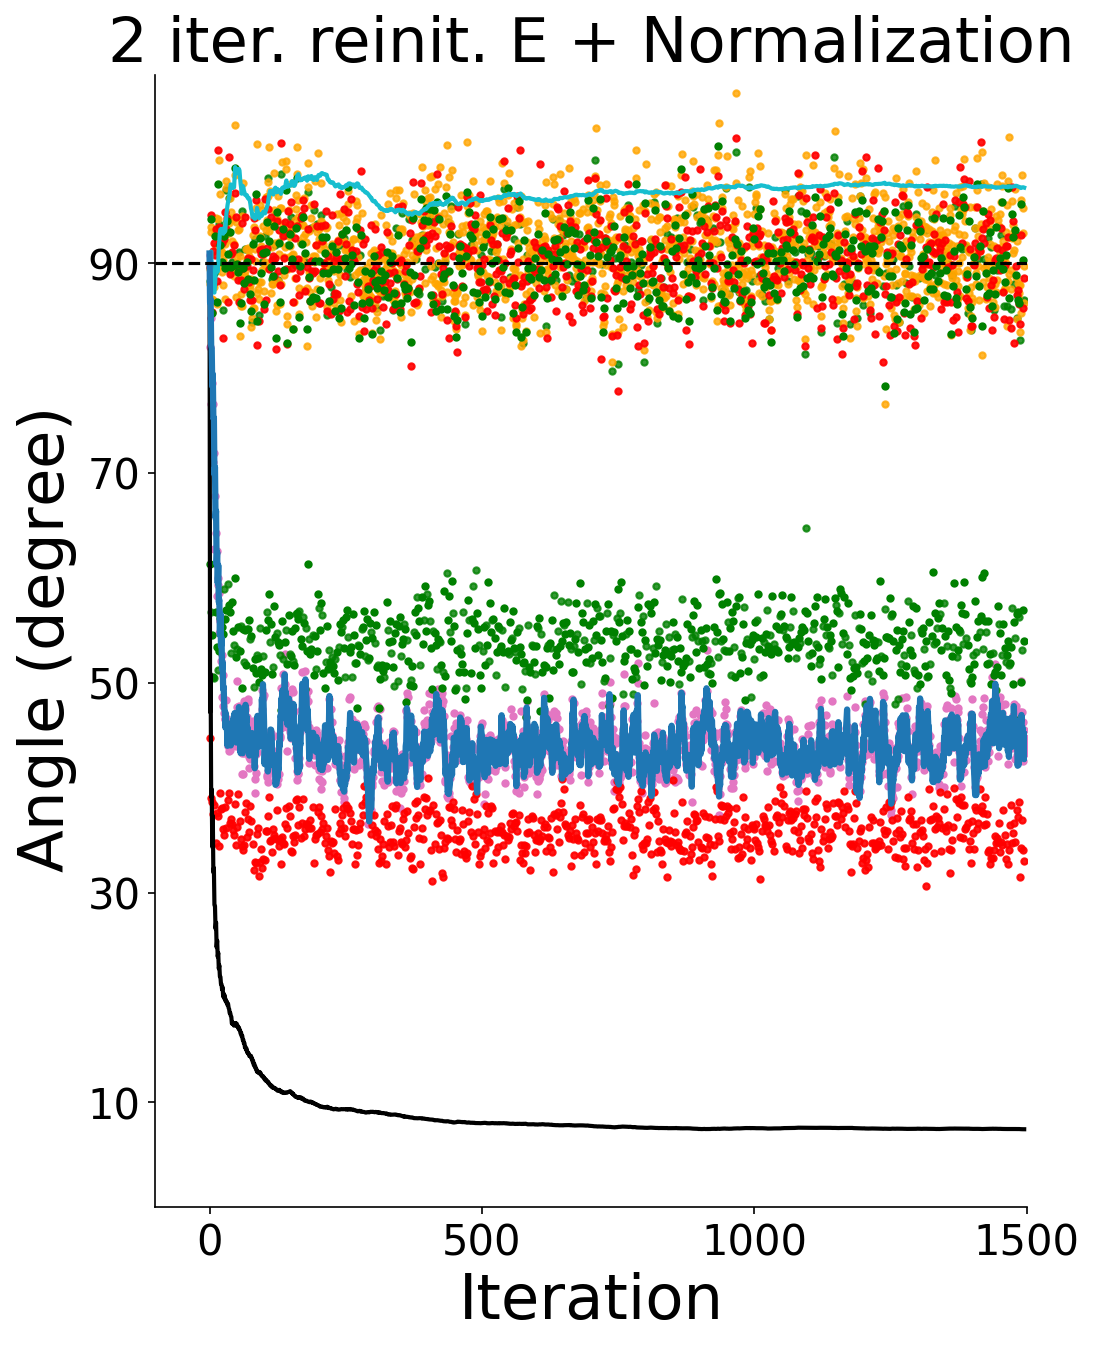

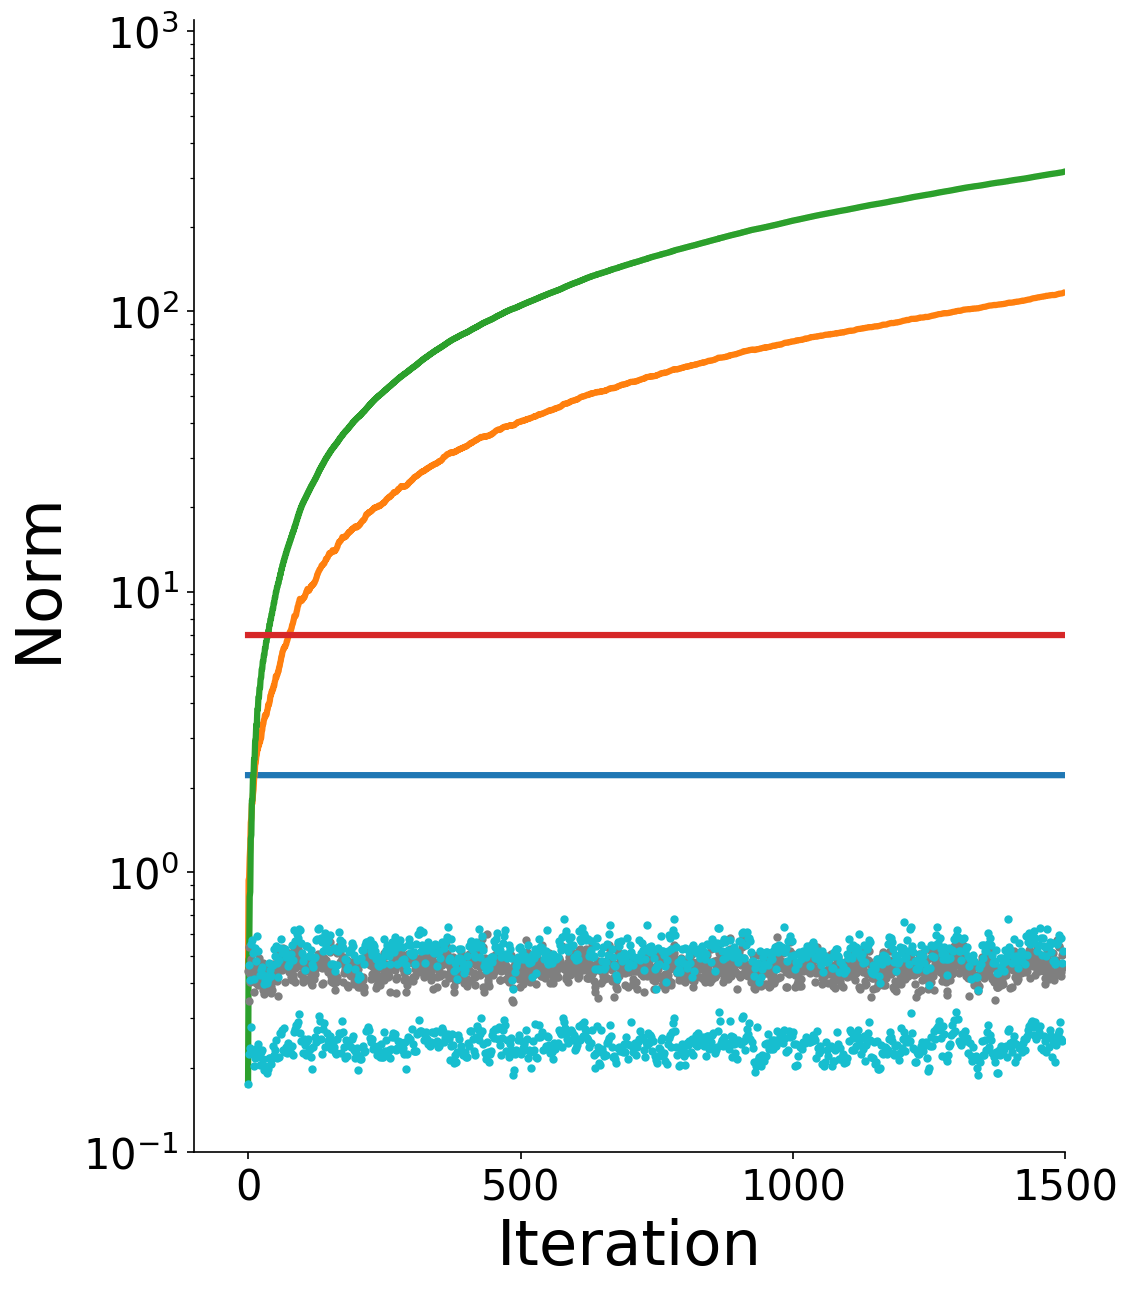

In [8]:



N_epoch = 1500
figsize__ = (7.5,10)

N_input = 100
N_hidden = 100
N_output = 10
N_batch = 100

lr = .002

W0 = (torch.randn([N_input , N_hidden])) 
W1 = (torch.randn([N_hidden , N_output]))  
B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 

angle_W1_B_list = []
angle_dW1_B_list = []

angle_W0_dw0_list = []
angle_W1_dw1_list = []

error_mean_list = []

error_mean_tensor = torch.zeros([N_output , N_epoch ])

loss_list = []

angle_dW0_bp_dW0_fa_list = []

angle_W0_W0_inf_list =[]
angle_W1_W1_inf_list =[]

alignment_term_SUM_angle_B_list  = []
supalignment_term_SUM_angle_B_list  = []


angle_dW1_W1_list = []

def activation1(x):
  
  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1
 

temp_list = []

norm_dw0_list = []
angle_W0_change_list = []
angle_E_change_list = []


E = torch.randn( [N_batch , N_output] )

E_list = []
delta0_list = []
delta1_list = []
W0_list = []
W1_list = []
L1_list = []
L2_list = []
Z1_list = []
Z2_list = []


norm_supalignment_term = []
norm_alignment_term = []

norm_W0 = []
norm_W1 = []


initial_norm_W0 = .7
initial_norm_W1 = .7


W0 = torch.div( W0 ,  W0.norm(dim=0).view( [1,-1] )  )  * initial_norm_W0
W1 = torch.div( W1 ,  W1.norm(dim=0).view( [1,-1] )  )  * initial_norm_W1



norm_SUM_supalignment_term = []
norm_SUM_alignment_term = []


dw1_dw1_angle_list = []

alignment_term_angle_B_list = []
sup_alignment_term_angle_B_list = []


alignment_term_sum = None
sup_alignment_term_sum = None

alignment_term_plus_supalignment_term_angle = []
for i in range(N_epoch):
  
  if i % 2 == 0:
    E = torch.randn( [N_batch , N_output] )


  Z1 = torch.matmul(   X  ,  W0  )
  L1 = activation1( Z1 )
  Z2 = torch.matmul(   L1  ,  W1  )
  L2 = activation1(  Z2   )



  delta1 = torch.mul( E , derivative_activation1( Z2 )  ) 
  dw1 = lr* torch.matmul (  L1.t()  ,  delta1  )



  delta0 = torch.matmul (  delta1  ,  B  )
  delta0 = torch.mul (  delta0  ,  derivative_activation1(Z1)   )


  dw0 = lr* torch.matmul (     X.t()   ,    delta0  )

  
  W0 = W0 + dw0
  W1 = W1 + dw1


  delta0_bp = torch.matmul (  delta1  ,  W1.t()  )
  delta0_bp = torch.mul (  delta0_bp  ,  derivative_activation1(Z1)   )

  dw0_bp = lr* torch.matmul (     X.t()   ,    delta0_bp  )

  angle_dW0_bp_dW0_fa_list.append( my_weight.angle(dw0_bp ,dw0 )  )



  angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )
  angle_dW1_B_list.append(   my_weight.angle(  dw1  ,  B.t()   )   )
  angle_dW1_W1_list.append(   my_weight.angle(  dw1  ,  W1   )   ) 



  E_list .append(E)
  delta0_list .append( delta0 )
  delta1_list .append( delta1 )

  L1_list .append( L1 )
  L2_list .append( L2 )
  Z1_list .append( Z1 )
  Z2_list .append( Z2 )


  if i > 3 :

    W0_k   = W0
    W0_k_1 = W0_list[-1]
    W0_k_2 = W0_list[-2]

    W1_k   = W1
    W1_k_1 = W1_list[-1]
    W1_k_2 = W1_list[-2]

    delta0_k_1 = delta0_list[-1]
    delta0_k_2 = delta0_list[-2]

    delta1_k_1 = delta1_list[-1]
    delta1_k_2 = delta1_list[-2]

    W0_k = W0_k_1.t()  +  lr * torch.matmul(  delta0_k_1.t()   ,   X   )


    temp1q = torch.matmul(  W0_k_1.t()  , X.t() )
    temp1q = activation1( temp1q )
    temp1q = lr*torch.matmul(   temp1q  ,  delta1_k_1  )

  

    dw1_dw1_angle_list.append(  (  W0_k.t() -  W0 ).sum()   )


    temp1 = torch.matmul (  W0_list[-2].t()  ,  X.t() )
    temp1 =  derivative_activation1( temp1 )  

    temp2 = torch.matmul( delta1_list[-2]  , B )
    temp3 =  derivative_activation1( Z1_list[-2] )  
    temp2 = torch.mul(temp2 , temp3)
    temp4 = torch.matmul (    torch.matmul (  temp2 .t() , X   )  , X.t()  )
    temp4 = torch.mul( temp1  , temp4   )
    temp4 = lr*lr*torch.matmul (  temp4  ,  delta1_list[-1]  )
    alignment_term = temp4


    temp11 = torch.matmul ( W0_list[-2].t() , X.t() )
    temp11 = activation1 ( temp11  )
    temp11 = lr*torch.matmul (  temp11  ,  delta1_list[-1]  )
    sup_alignment_term = temp11
  
    if alignment_term_sum == None : alignment_term_sum = alignment_term 
    else:
      alignment_term_sum = alignment_term_sum + alignment_term 

    if sup_alignment_term_sum == None : sup_alignment_term_sum = sup_alignment_term 
    else:
      sup_alignment_term_sum = sup_alignment_term_sum + sup_alignment_term




    alignment_term_angle_B_list.append(   my_weight.angle( alignment_term  ,  B.t() )   )
    sup_alignment_term_angle_B_list.append(   my_weight.angle( sup_alignment_term  ,  B.t() )  )

    alignment_term_plus_supalignment_term_angle.append(   my_weight.angle( alignment_term + sup_alignment_term ,  B.t() )     )

    alignment_term_SUM_angle_B_list.append(   my_weight.angle( alignment_term_sum ,  B.t() )     )
    supalignment_term_SUM_angle_B_list.append(   my_weight.angle( sup_alignment_term_sum ,  B.t() )     )


    W0 = torch.div( W0 ,  W0.norm(dim=0).view( [1,-1] )  )  * initial_norm_W0
    W1 = torch.div( W1 ,  W1.norm(dim=0).view( [1,-1] )  )  * initial_norm_W1


    norm_W0 .append(  W0.norm() )
    norm_W1  .append(  W1.norm() )

    norm_SUM_supalignment_term .append(  sup_alignment_term_sum.norm() )
    norm_SUM_alignment_term .append(  alignment_term_sum.norm() )

    norm_supalignment_term .append(  sup_alignment_term.norm() )
    norm_alignment_term .append(  alignment_term.norm() )




    temp_list.append(  my_weight.angle ( alignment_term + sup_alignment_term , dw1 )  )



  W0_list.append( W0 )
  W1_list.append( W1 )





angle_W1_B_fixed_E = angle_W1_B_list  





plt.figure(num = None, figsize=figsize__, dpi=150, facecolor='w', edgecolor='k')



list_index1 = list ( range(0,len(alignment_term_plus_supalignment_term_angle) , 3) )
list_index2 = []

for i in range( len (alignment_term_plus_supalignment_term_angle) ):
  if not i in list_index1:
    list_index2.append(i)


plt.plot( angle_dW0_bp_dW0_fa_list  , '.' , label =  r"$\Delta W_{0,FA} \measuredangle \Delta W_{0,BP} $" 
         , alpha = 1 , color=my_cycle[-2] , markersize = 6 ,zorder=1 ) 



plt.plot( list_index1 , [alignment_term_plus_supalignment_term_angle[i] for i in list_index1]  , '.' , label =  r"$\Delta W_1 \measuredangle B^T $" , alpha = 0.8 , color='g' , markersize = 6 ,zorder=1 ) 

plt.plot( sup_alignment_term_angle_B_list   , '.' , label =  r"$T_{subalign} \measuredangle B^T $" , alpha = 0.8 , color='orange' , markersize = 6 ,zorder=1) 
plt.plot( alignment_term_angle_B_list  , '.' , label = r"$T_{align} \measuredangle B^T $" , alpha = 0.9 , color='r' , markersize = 6 ,zorder = 1 ) 

plt.plot( list_index2 , [alignment_term_plus_supalignment_term_angle[i] for i in list_index2]  , '.' , label =  r"$\Delta W_1 \measuredangle B^T $" , alpha = 1 , color='g' , markersize = 6 ,zorder=1 ) 




plt.plot( alignment_term_SUM_angle_B_list   , '-' , label =  r"$\sum T_{align} \measuredangle B^T  $" , alpha = 1  , linewidth = 2 , color= 'k' ) 
plt.plot( supalignment_term_SUM_angle_B_list   , '-' , label =  r"$\sum T_{subalign} \measuredangle B^T $" , alpha = 1  , linewidth = 2 , color= my_cycle[5]  ) 
plt.plot( angle_W1_B_fixed_E  , '-' , label = r"$W_1 \measuredangle B^T $" , linewidth = 3 , color = my_cycle[0] ) 




plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$Angle\ (degree)$", fontsize= plt_fontsize_label_)

plt.hlines( y=90 , xmin=-100 , xmax=N_epoch  , linestyle = '--' , zorder = 100)


plt.title('2 iter. reinit. E + Normalization' , fontsize= plt_fontsize_label_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(0,108)
plt.xlim(-100 ,N_epoch)
plt.yticks([10,30 ,50 ,70 ,90])
plt.savefig(base_directory_figure_str + '/2 iter. reinit. E  Normalization _angle_n1.jpg' , dpi=300 , bbox_inches='tight' ) 

plt.show()






plt.figure(num = None, figsize=figsize__, dpi=150, facecolor='w', edgecolor='k')





plt.plot( norm_W1  , '-' , label = r"$\Vert W_1 \Vert_{_2}$"  , linewidth =3 , color= my_cycle[0] ) 


plt.plot( norm_SUM_supalignment_term  , '-' , label = r"$\Vert \sum T_{supalign} \Vert_{_2}$"  , linewidth = 3 , color= my_cycle[1]  ) 
plt.plot( norm_SUM_alignment_term  , '-' , label = r"$\Vert \sum T_{align} \Vert_{_2}$", linewidth = 3  , color= my_cycle[2] ) 

plt.plot( norm_W0  , '-' , label = r"$\Vert W_0 \Vert_{_2}$" , linewidth = 3, color= my_cycle[3] ) 



plt.plot( norm_supalignment_term  , '.' , label = r"$\Vert T_{supalign} \Vert_{_2}$"  , linewidth = 3 , color= my_cycle[4] ) 
plt.plot( norm_alignment_term  , '.' , label = r"$\Vert T_{align} \Vert_{_2}$", linewidth = 3  , color= my_cycle[5]) 

plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$Norm$", fontsize= plt_fontsize_label_)




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim( 0.1 , 1100)
plt.yscale('log')
plt.savefig(base_directory_figure_str + '/2 iter. reinit. E  Normalization _norm_n1.jpg' , dpi=300 , bbox_inches='tight'  ) 

plt.xlim(-100 ,N_epoch)

plt.show()



